<a href="https://colab.research.google.com/github/jeet1912/ms/blob/main/cs670/Project/Phase1/OxCGRT_phase1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from google.colab.data_table import DataTable
import geopandas as gpd
from matplotlib.lines import Line2D

DataTable.max_columns = 1000

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import data

In [ ]:
url = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-dataset/main/data/OxCGRT_compact_national_v1.csv'

df = pd.read_csv(url)

## Data Description and Wrangling

In [ ]:
print('The shape of our dataset is {}.'.format(df.shape))
print('Displaying the first 5 entries')
df.head()

The shape of our dataset is (202760, 56).
Displaying the first 5 entries


CountryName CountryCode  RegionName  RegionCode Jurisdiction      Date  \
0       Aruba         ABW         NaN         NaN    NAT_TOTAL  20200101   
1       Aruba         ABW         NaN         NaN    NAT_TOTAL  20200102   
2       Aruba         ABW         NaN         NaN    NAT_TOTAL  20200103   
3       Aruba         ABW         NaN         NaN    NAT_TOTAL  20200104   
4       Aruba         ABW         NaN         NaN    NAT_TOTAL  20200105   

   C1M_School closing  C1M_Flag  C2M_Workplace closing  C2M_Flag  ...  \
0                 0.0       NaN                    0.0       NaN  ...   
1                 0.0       NaN                    0.0       NaN  ...   
2                 0.0       NaN                    0.0       NaN  ...   
3                 0.0       NaN                    0.0       NaN  ...   
4                 0.0       NaN                    0.0       NaN  ...   

   V3_Vaccine Financial Support (summary)  V4_Mandatory Vaccination (summary)  \
0                                       0                                 NaN   
1                                       0                                 NaN   
2                                       0                                 NaN   
3                                       0                                 NaN   
4                                       0                                 NaN   

   ConfirmedCases  ConfirmedDeaths  MajorityVaccinated  PopulationVaccinated  \
0             0.0              0.0                  NV                   0.0   
1             0.0              0.0                  NV                   0.0   
2             0.0              0.0                  NV                   0.0   
3             0.0              0.0                  NV                   0.0   
4             0.0              0.0                  NV                   0.0   

   StringencyIndex_Average  GovernmentResponseIndex_Average  \
0                      0.0                              0.0   
1                      0.0                              0.0   
2                      0.0                              0.0   
3                      0.0                              0.0   
4                      0.0                              0.0   

   ContainmentHealthIndex_Average  EconomicSupportIndex  
0                             0.0                   0.0  
1                             0.0                   0.0  
2                             0.0                   0.0  
3                             0.0                   0.0  
4                             0.0                   0.0  

[5 rows x 56 columns]

#### View the output of df.head() in a tabular format.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202760 entries, 0 to 202759
Data columns (total 56 columns):
 #   Column                                                                           Non-Null Count   Dtype  
---  ------                                                                           --------------   -----  
 0   CountryName                                                                      202760 non-null  object 
 1   CountryCode                                                                      202760 non-null  object 
 2   RegionName                                                                       0 non-null       float64
 3   RegionCode                                                                       0 non-null       float64
 4   Jurisdiction                                                                     202760 non-null  object 
 5   Date                                                                             202760 non-null  int64  
 



*   Columns 'RegionName' and 'RegionCode' will be dropped since they contain 0 non-null entries.
*  Column 'CountryCode' is dropped to avoid redundancy.



In [ ]:
df = df.drop(columns=['RegionName','RegionCode','CountryName'])
print(df.shape)

(202760, 53)


#### Converting 'Date' to datetime.

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')

In [ ]:
start_date = df['Date'].min()
end_date = df['Date'].max()
print("Start Date: {}, End Date: {}".format(start_date,end_date))

Start Date: 2020-01-01 00:00:00, End Date: 2022-12-31 00:00:00


In [ ]:
# Select columns by data type, excluding datetime columns
non_datetime_columns = df.select_dtypes(exclude=['datetime64[ns]']).columns

# Applying value_counts to display the unique_values and their frequency.
values_of_each_column = {col: df[col].value_counts(dropna=False) for col in non_datetime_columns}

values_of_each_column

{'CountryCode': ABW    1096
 PAK    1096
 NAM    1096
 NER    1096
 NGA    1096
        ... 
 GMB    1096
 GRC    1096
 GRL    1096
 GTM    1096
 ZWE    1096
 Name: CountryCode, Length: 185, dtype: int64,
 'Jurisdiction': NAT_TOTAL    202760
 Name: Jurisdiction, dtype: int64,
 'C1M_School closing': 0.0    74497
 1.0    55839
 3.0    41246
 2.0    31178
 Name: C1M_School closing, dtype: int64,
 'C1M_Flag': 1.0    107134
 NaN     74497
 0.0     21129
 Name: C1M_Flag, dtype: int64,
 'C2M_Workplace closing': 0.0    68936
 2.0    64722
 1.0    51824
 3.0    17278
 Name: C2M_Workplace closing, dtype: int64,
 'C2M_Flag': 1.0    106742
 NaN     68936
 0.0     27082
 Name: C2M_Flag, dtype: int64,
 'C3M_Cancel public events': 2.0    85119
 0.0    64184
 1.0    53457
 Name: C3M_Cancel public events, dtype: int64,
 'C3M_Flag': 1.0    119017
 NaN     64184
 0.0     19559
 Name: C3M_Flag, dtype: int64,
 'C4M_Restrictions on gatherings': 0.0    76960
 4.0    58642
 3.0    44672
 2.0    16520
 1.0    


*   We've 1096 entries for each country, having a total of 185 countries represented in this dataset.
*   Dropping 'Jurisdiction' since it has only one unique value.



In [ ]:
df = df.drop(columns=['Jurisdiction'])
print(df.shape)

(202760, 52)


#### Converting object dtypes to categorical

Useful for plotting V2B, V2C and Majority Vaccinated.

In [ ]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')

In [ ]:
df.dtypes

CountryCode                                                                              category
Date                                                                               datetime64[ns]
C1M_School closing                                                                        float64
C1M_Flag                                                                                  float64
C2M_Workplace closing                                                                     float64
C2M_Flag                                                                                  float64
C3M_Cancel public events                                                                  float64
C3M_Flag                                                                                  float64
C4M_Restrictions on gatherings                                                            float64
C4M_Flag                                                                                  float64
C5M_Close public tra

### Dealing With Missing Values

In [ ]:
df.isna().sum()

CountryCode                                                                             0
Date                                                                                    0
C1M_School closing                                                                      0
C1M_Flag                                                                            74497
C2M_Workplace closing                                                                   0
C2M_Flag                                                                            68936
C3M_Cancel public events                                                                0
C3M_Flag                                                                            64184
C4M_Restrictions on gatherings                                                          0
C4M_Flag                                                                            76960
C5M_Close public transport                                                              0
C5M_Flag  

#### Drop entries where 'ConfirmedCases' and 'ConfirmedDeaths' are NaNs

In [ ]:
df = df.dropna(subset=['ConfirmedCases', 'ConfirmedDeaths'])
print(df.shape)

(201664, 52)


#### Drop 'MajorityVaccinated' and 'PopulationVaccinated'.

In [ ]:
df = df.drop(columns=['MajorityVaccinated', 'PopulationVaccinated'])
print(df.shape)

(201664, 50)


#### Removing duplicates

In [ ]:
df = df.drop_duplicates()

#### Reset the index of our dataframe

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
print(df.shape)


(201664, 50)


#### We didn't have any duplicate entries in the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201664 entries, 0 to 201663
Data columns (total 50 columns):
 #   Column                                                                           Non-Null Count   Dtype         
---  ------                                                                           --------------   -----         
 0   CountryCode                                                                      201664 non-null  category      
 1   Date                                                                             201664 non-null  datetime64[ns]
 2   C1M_School closing                                                               201664 non-null  float64       
 3   C1M_Flag                                                                         127648 non-null  float64       
 4   C2M_Workplace closing                                                            201664 non-null  float64       
 5   C2M_Flag                                                  

### Univariate Analysis
Conducted to examine the columns in an easier and visual way.

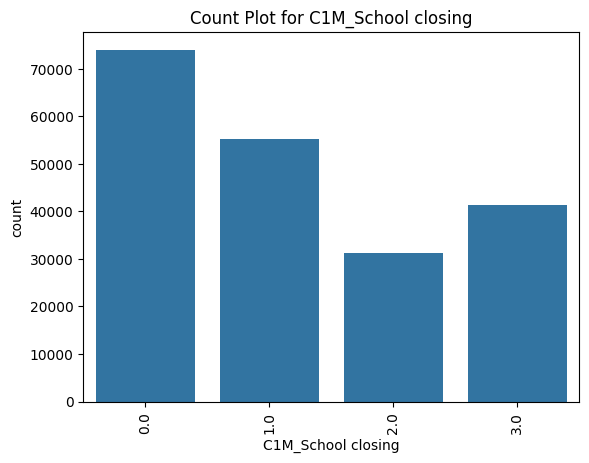

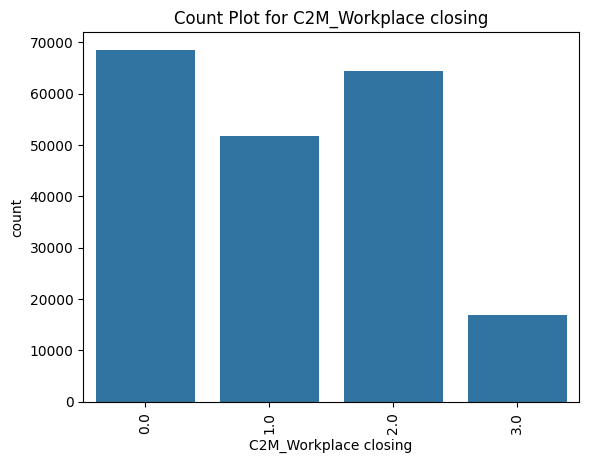

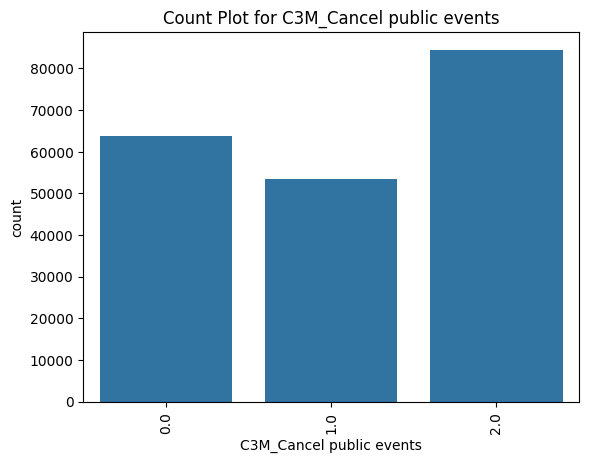

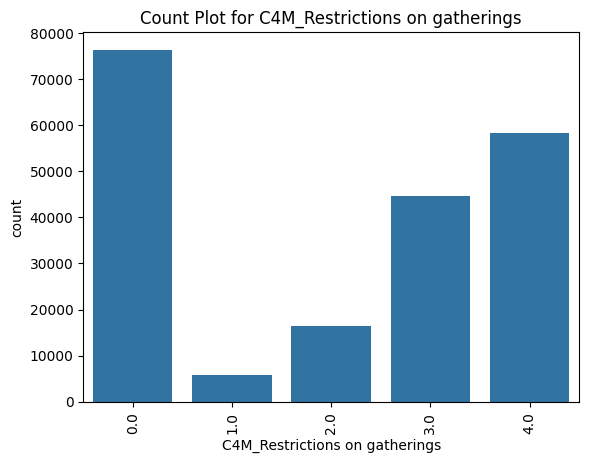

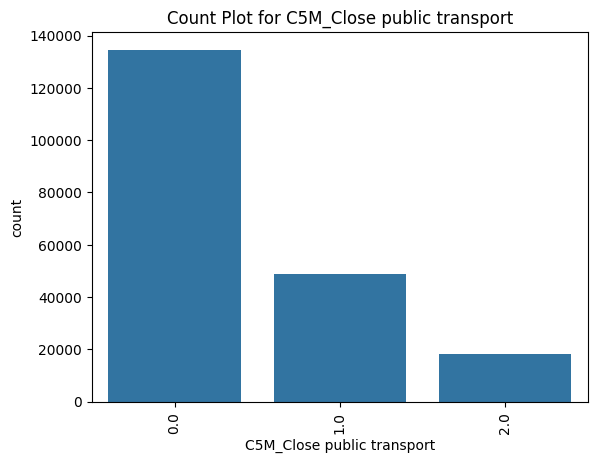

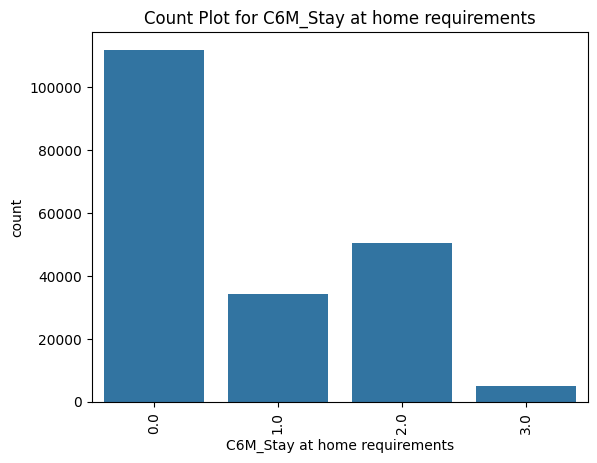

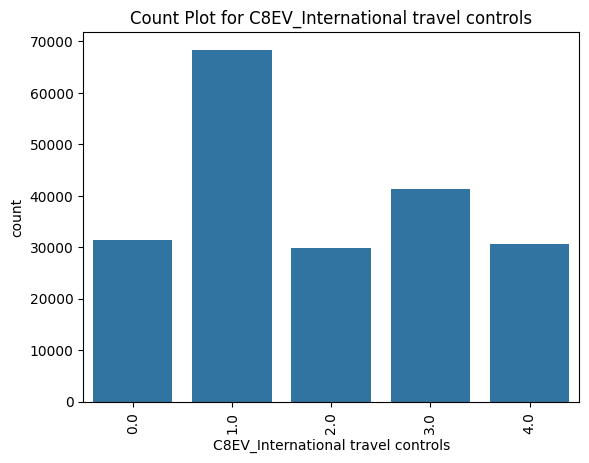

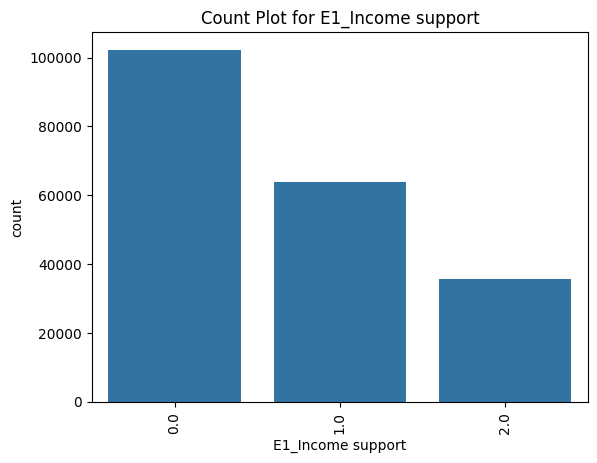

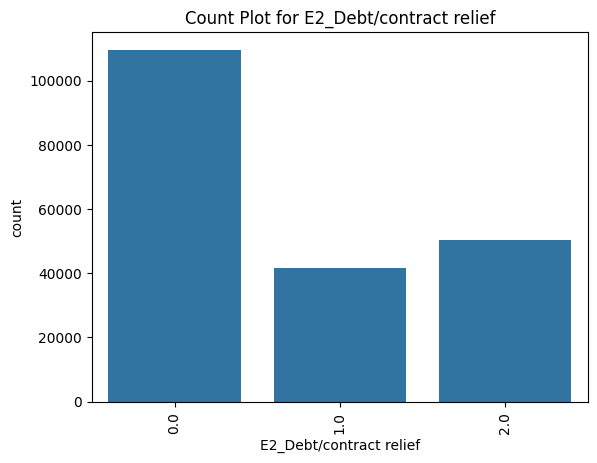

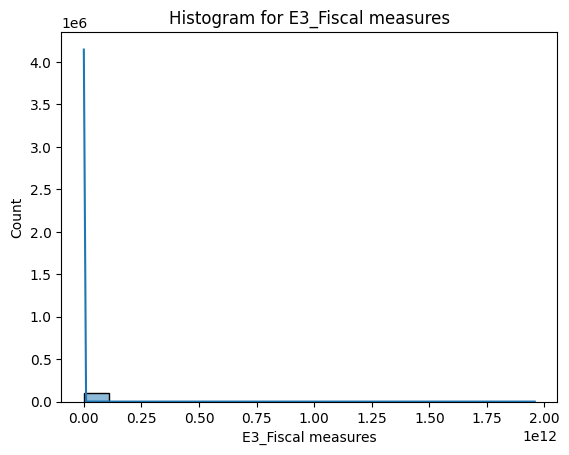

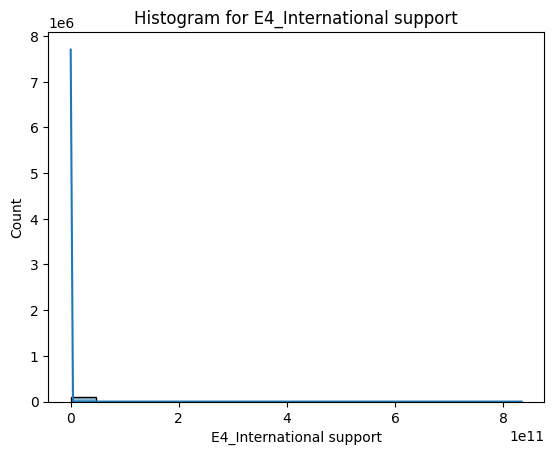

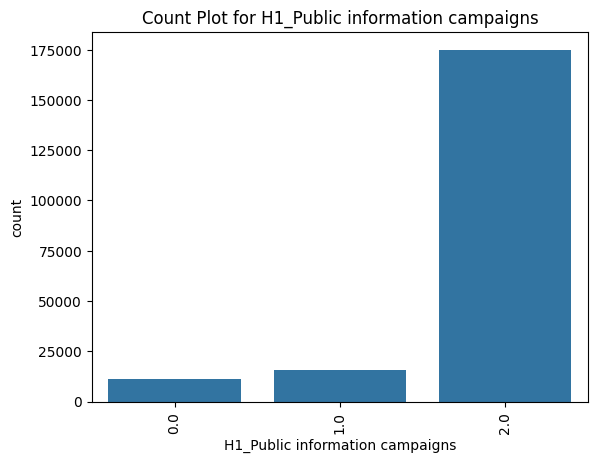

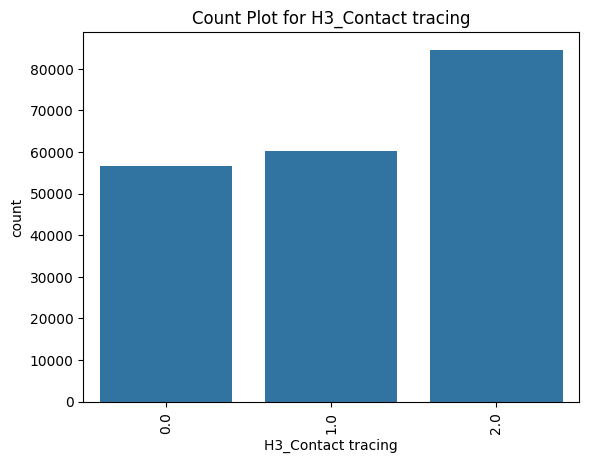

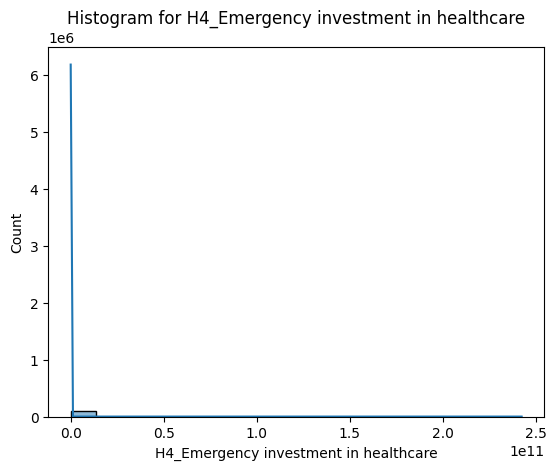

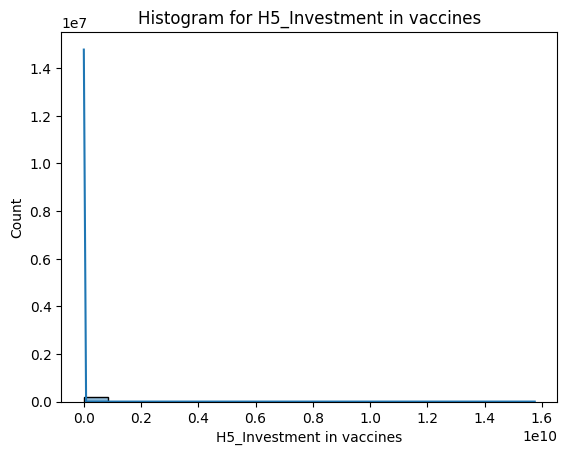

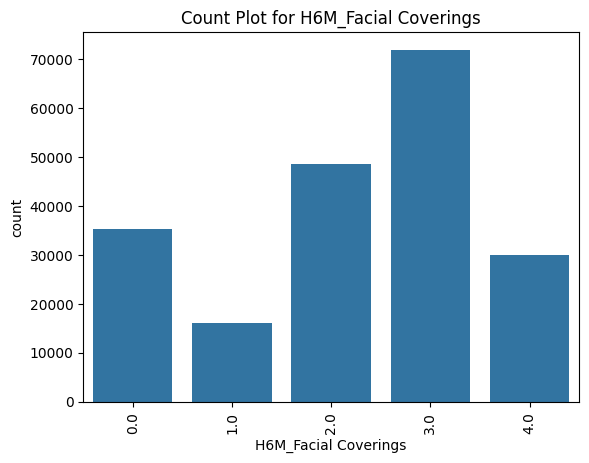

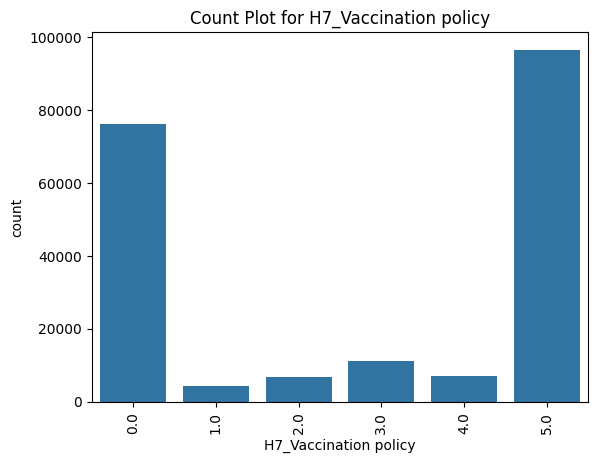

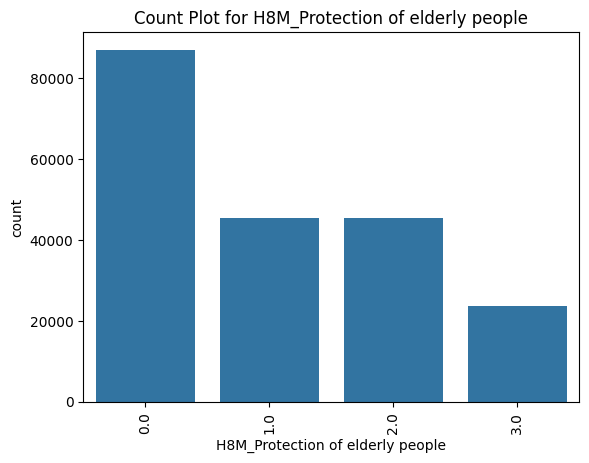

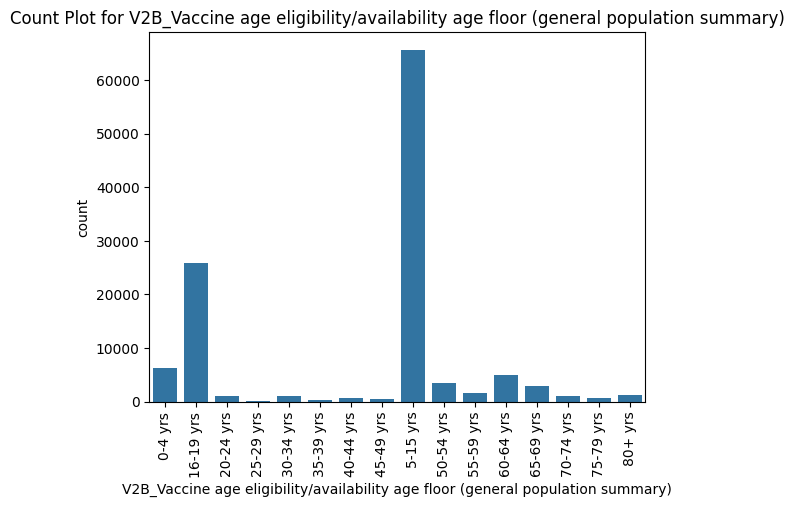

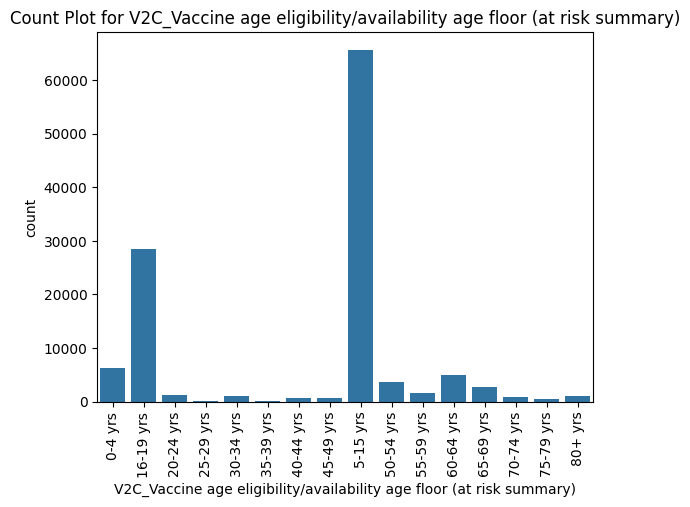

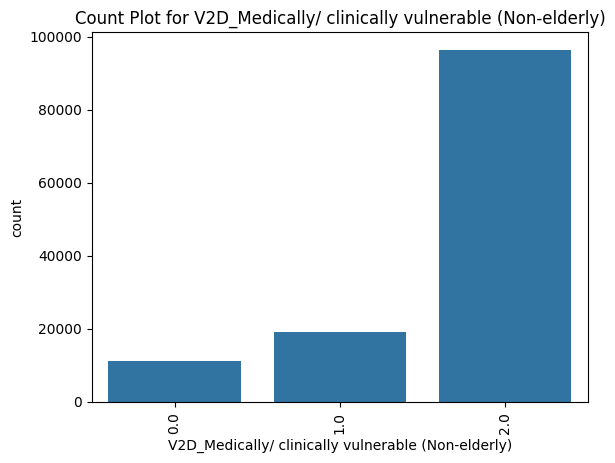

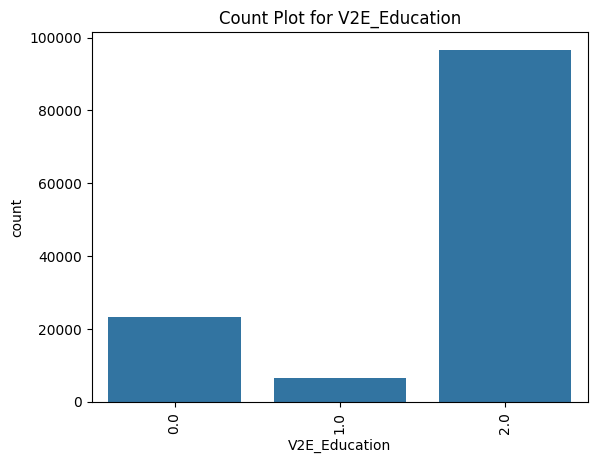

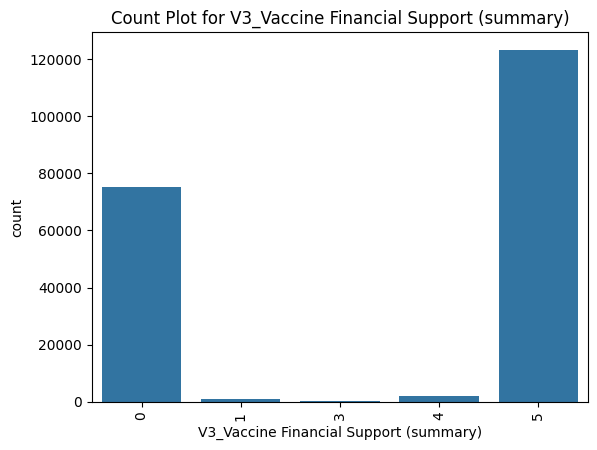

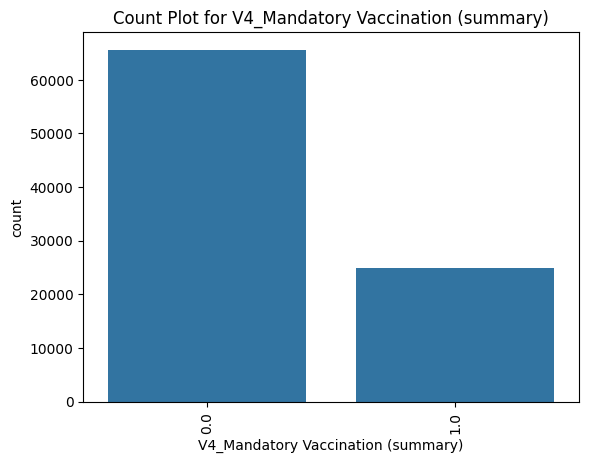

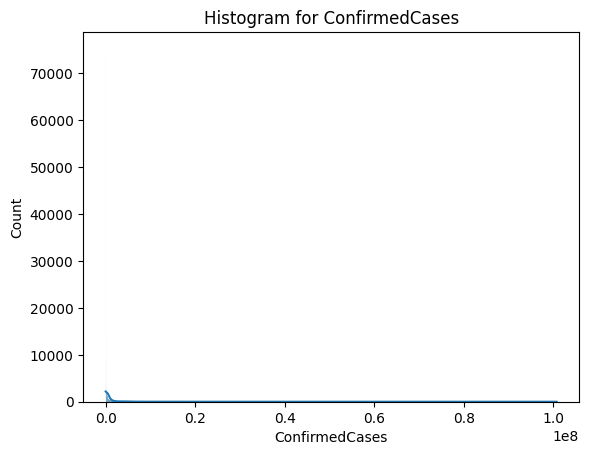

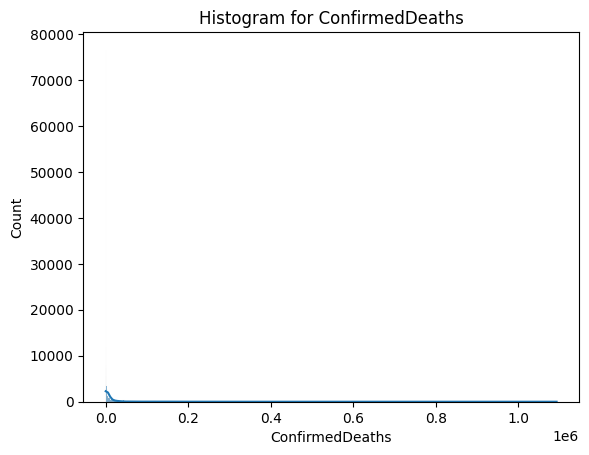

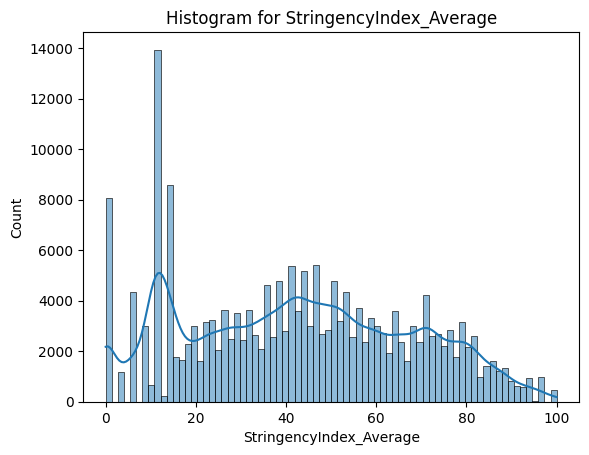

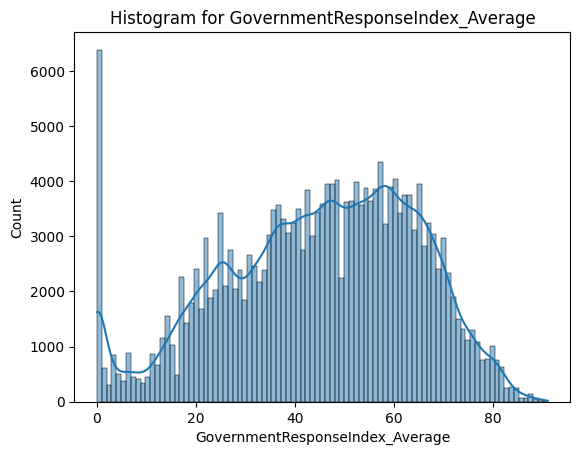

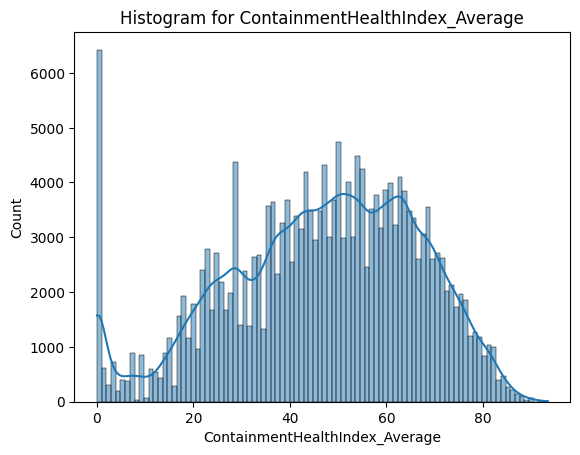

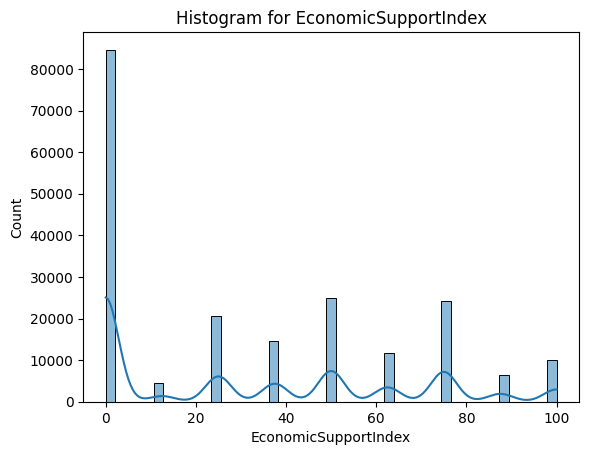

Start Date: 2020-01-01 00:00:00, End Date: 2022-12-31 00:00:00


In [ ]:
helper_df = pd.read_csv('/content/drive/MyDrive/CIC/data_description.csv')

helper_df = helper_df.rename(columns={
    helper_df.columns[0]: 'Column_Name',
    helper_df.columns[1]: 'Description',
    helper_df.columns[2]: 'Measurement',
    helper_df.columns[3]: 'Coding'
}).iloc[1:]

def decide_and_plot(df, column, measurement_info):
    if measurement_info in ['Ordinal', 'Ordinal scale', 'Ordinal Scale', 'Binary Flag', 'Binary', 'Binary Flag for sectoral scope', 'Binary Flag for geographical scope', 'Categorical']:
        # Count plot for categorical and binary data
        sns.countplot(data=df, x=column)
        plt.title(f'Count Plot for {column}')
        plt.xticks(rotation=90)
        plt.show()
    elif measurement_info in ['USD', 'Number', 'Numeric', 'Numerical']:
        # Histogram for numerical data
        sns.histplot(data=df, x=column, kde=True)
        plt.title(f'Histogram for {column}')
        plt.show()

# Exclude 'Date' and 'CountryName' from the plot generation process as per user request
exclude_columns = ['Date', 'CountryName']
columns_for_plot = [col for col in df.columns if col not in exclude_columns]

# Generate plots for each column based on the updated guidance
for column in columns_for_plot:
    measurement_type = helper_df[helper_df['Column_Name'] == column]['Measurement'].values
    if measurement_type.size > 0:
        decide_and_plot(df, column, measurement_type[0])



start_date = df['Date'].min()
end_date = df['Date'].max()
print(f"Start Date: {start_date}, End Date: {end_date}")


#### Considering nationwide policies only

In [ ]:
# Identify columns that end with 'Flag' but are not 'E1_Flag' or 'H7_Flag'
flag_columns = [col for col in df.columns if col.endswith('Flag') and col not in ['E1_Flag', 'H7_Flag']]

# Filter rows where any of the identified flag columns have a value of 1,
df = df[(df[flag_columns] == 1).any(axis=1)]

df = df.drop(columns=flag_columns)

df.shape

(192683, 40)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192683 entries, 75 to 201663
Data columns (total 40 columns):
 #   Column                                                                           Non-Null Count   Dtype         
---  ------                                                                           --------------   -----         
 0   CountryCode                                                                      192683 non-null  category      
 1   Date                                                                             192683 non-null  datetime64[ns]
 2   C1M_School closing                                                               192683 non-null  float64       
 3   C2M_Workplace closing                                                            192683 non-null  float64       
 4   C3M_Cancel public events                                                         192683 non-null  float64       
 5   C4M_Restrictions on gatherings                           

In [ ]:
df.describe()

C1M_School closing  C2M_Workplace closing  C3M_Cancel public events  \
count       192683.000000          192683.000000             192683.000000   
mean             1.251947               1.199976                  1.153994   
std              1.136648               0.976644                  0.836348   
min              0.000000               0.000000                  0.000000   
25%              0.000000               0.000000                  0.000000   
50%              1.000000               1.000000                  1.000000   
75%              2.000000               2.000000                  2.000000   
max              3.000000               3.000000                  2.000000   

       C4M_Restrictions on gatherings  C5M_Close public transport  \
count                   192683.000000               192683.000000   
mean                         2.107264                    0.442151   
std                          1.692173                    0.659763   
min                          0.000000                    0.000000   
25%                          0.000000                    0.000000   
50%                          3.000000                    0.000000   
75%                          4.000000                    1.000000   
max                          4.000000                    2.000000   

       C6M_Stay at home requirements  C7M_Restrictions on internal movement  \
count                  192683.000000                          192683.000000   
mean                        0.778771                               0.608471   
std                         0.922964                               0.855062   
min                         0.000000                               0.000000   
25%                         0.000000                               0.000000   
50%                         0.000000                               0.000000   
75%                         2.000000                               1.000000   
max                         3.000000                               2.000000   

       C8EV_International travel controls  E1_Income support       E1_Flag  \
count                       192683.000000      192683.000000  99353.000000   
mean                             1.932838           0.700794      0.625467   
std                              1.300082           0.761586      0.484005   
min                              0.000000           0.000000      0.000000   
25%                              1.000000           0.000000      0.000000   
50%                              2.000000           1.000000      1.000000   
75%                              3.000000           1.000000      1.000000   
max                              4.000000           2.000000      1.000000   

       ...  V2F_Frontline workers  (non healthcare)  \
count  ...                            125945.000000   
mean   ...                                 1.754964   
std    ...                                 0.630427   
min    ...                                 0.000000   
25%    ...                                 2.000000   
50%    ...                                 2.000000   
75%    ...                                 2.000000   
max    ...                                 2.000000   

       V2G_Frontline workers  (healthcare)  \
count                        125945.000000   
mean                              1.804788   
std                               0.467794   
min                               0.000000   
25%                               2.000000   
50%                               2.000000   
75%                               2.000000   
max                               2.000000   

       V3_Vaccine Financial Support (summary)  \
count                           192683.000000   
mean                                 3.235828   
std                                  2.375451   
min                                  0.000000   
25%                                  0.000000   
50%                                  5.000000   
75%          

### Imputation Strategy

Filling NaNs with mean, median or mode values at National Level. If that fails, a fallback is added to impute a global statistic.

May use it later.

In [ ]:
'''
missing_values_count = df.isna().sum()
missing_values_count = missing_values_count[missing_values_count > 0]

column_data_types = df.dtypes

# use mean, median, or mode for imputation, based on the data type
imputation_strategy = {}
for column in missing_values_count.index:
    if column_data_types[column] in ['float64', 'int64']:
        imputation_strategy[column] = 'median'
    else:
        imputation_strategy[column] = 'mode'

# imputation with a fallback
def impute_with_fallback(series, strategy):
    if strategy == 'median':
        global_fallback = series.median()
        return series.fillna(series.groupby(df['CountryName']).transform('median').fillna(global_fallback))
    elif strategy == 'mode':
        global_fallback = series.mode().iloc[0] if not series.mode().empty else None
        return series.fillna(series.groupby(df['CountryName']).transform(lambda x: x.mode()[0] if not x.mode().empty else global_fallback))

for column, strategy in imputation_strategy.items():
    if strategy == 'median':
        df[column] = impute_with_fallback(df[column], strategy)
    elif strategy == 'mode':
        df[column] = df[column].astype('str')
        df[column] = impute_with_fallback(df[column], strategy)
        df[column] = df[column].replace('nan', np.nan)


df.isna().sum()

#still need to do it for V2B and V2C
missing_values_after_imputation = df.isna().sum()
missing_values_after_imputation = missing_values_after_imputation[missing_values_after_imputation > 0]
for column in missing_values_after_imputation.index:
    column_mode = df[column].mode()
    mode_value = column_mode.iloc[0] if not column_mode.empty else np.nan
    df[column] = df[column].fillna(mode_value)

df.isna().sum()
'''

"\nmissing_values_count = df.isna().sum()\nmissing_values_count = missing_values_count[missing_values_count > 0]\n\ncolumn_data_types = df.dtypes\n\n# use mean, median, or mode for imputation, based on the data type\nimputation_strategy = {}\nfor column in missing_values_count.index:\n    if column_data_types[column] in ['float64', 'int64']:\n        imputation_strategy[column] = 'median'\n    else:\n        imputation_strategy[column] = 'mode'\n\n# imputation with a fallback\ndef impute_with_fallback(series, strategy):\n    if strategy == 'median':\n        global_fallback = series.median()\n        return series.fillna(series.groupby(df['CountryName']).transform('median').fillna(global_fallback))\n    elif strategy == 'mode':\n        global_fallback = series.mode().iloc[0] if not series.mode().empty else None\n        return series.fillna(series.groupby(df['CountryName']).transform(lambda x: x.mode()[0] if not x.mode().empty else global_fallback))\n\nfor column, strategy in imputati

####Fill NaNs with 0.

In [ ]:
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        df.loc[:, col] = df[col].fillna(0)
    elif pd.api.types.is_categorical_dtype(df[col]):
        if '0' not in df[col].cat.categories:
            df[col] = df[col].cat.add_categories('0')
        df.loc[:, col] = df[col].fillna('0')

<ipython-input-82-16594e62ec65>:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, col] = df[col].fillna('0')
<ipython-input-82-16594e62ec65>:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, col] = df[col].fillna('0')
<ipython-input-82-16594e62ec65>:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df

### Correlation Matrix

<ipython-input-83-31124b6d6fa0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


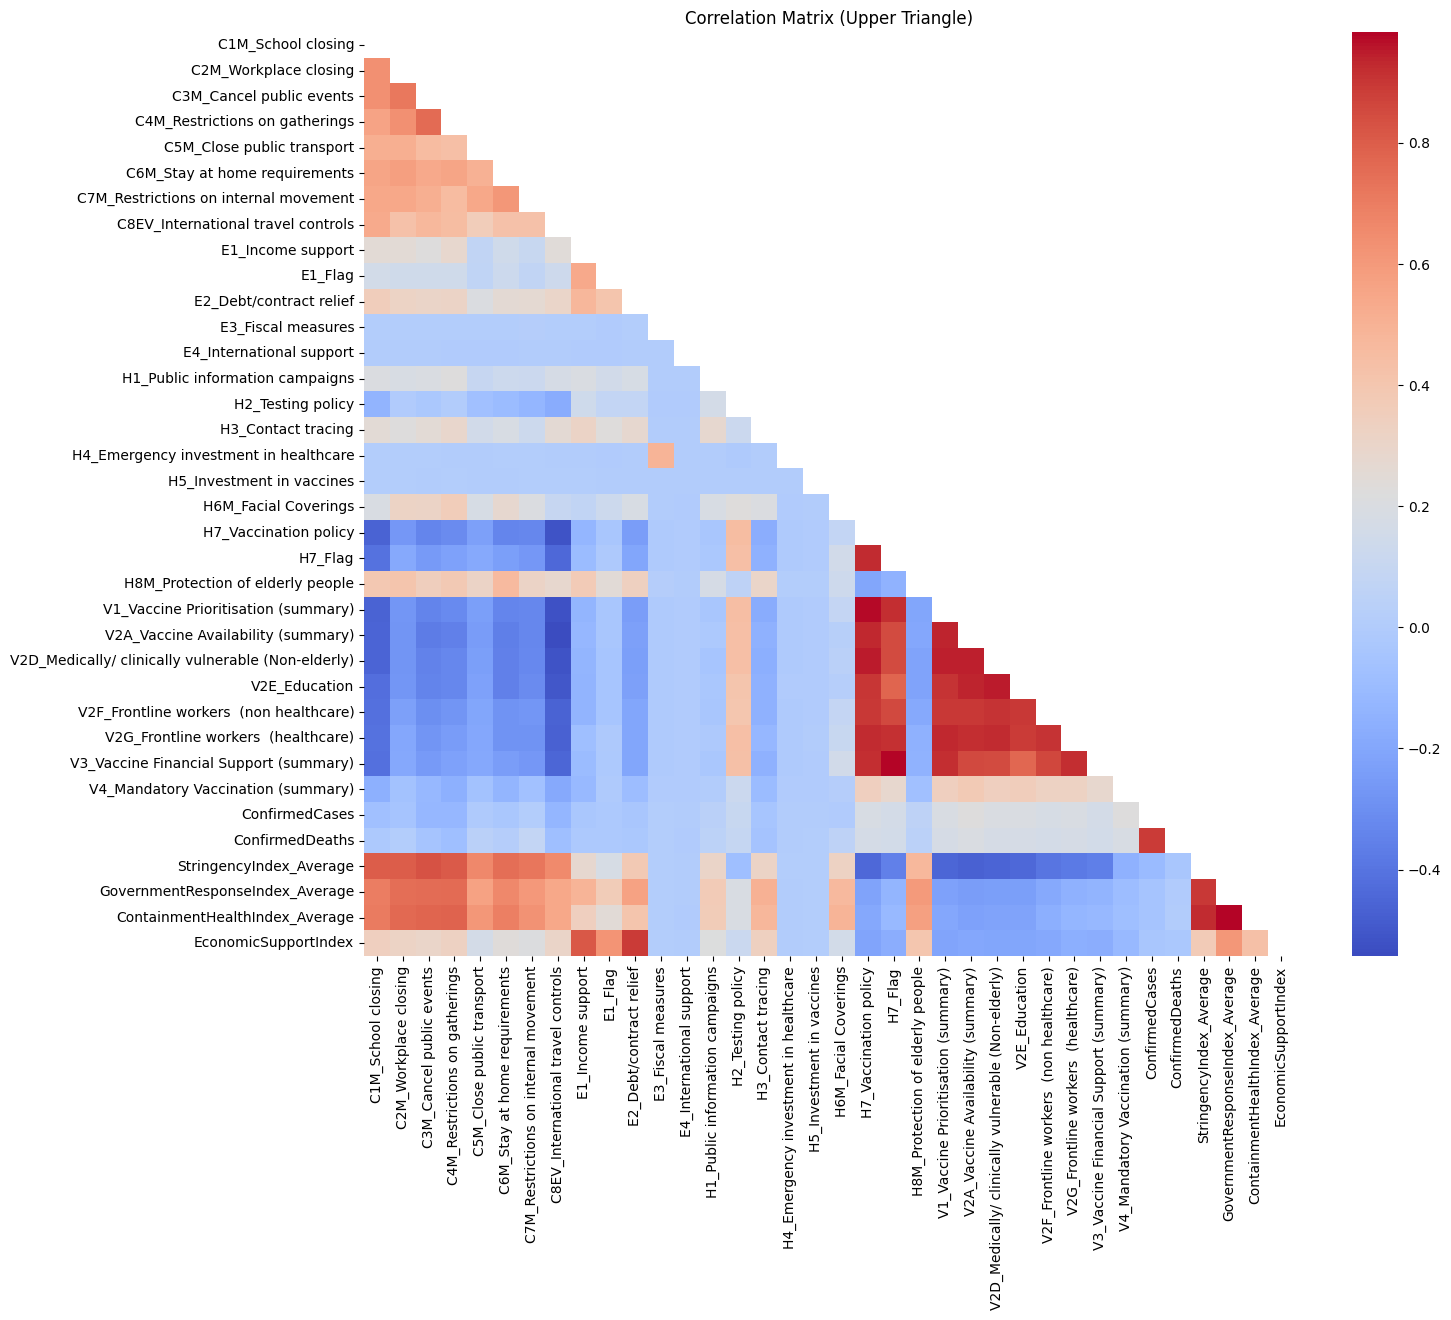

Columns: V2E_Education and V2G_Frontline workers  (healthcare), Correlation Coefficient: 0.89
Columns: E1_Income support and GovernmentResponseIndex_Average, Correlation Coefficient: 0.49
Columns: H7_Vaccination policy and V2G_Frontline workers  (healthcare), Correlation Coefficient: 0.93
Columns: C7M_Restrictions on internal movement and GovernmentResponseIndex_Average, Correlation Coefficient: 0.60
Columns: C3M_Cancel public events and ContainmentHealthIndex_Average, Correlation Coefficient: 0.78
Columns: H7_Vaccination policy and V2E_Education, Correlation Coefficient: 0.90
Columns: V2F_Frontline workers  (non healthcare) and V3_Vaccine Financial Support (summary), Correlation Coefficient: 0.86
Columns: C3M_Cancel public events and StringencyIndex_Average, Correlation Coefficient: 0.83
Columns: C8EV_International travel controls and V2D_Medically/ clinically vulnerable (Non-elderly), Correlation Coefficient: -0.51
Columns: ContainmentHealthIndex_Average and GovernmentResponseIndex_A

145

In [ ]:
corr_matrix = df.corr()

# Mask to display only one half
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=False) # since we've too many variables here. However, we shall display pairs having a correlation coefficient more or less than a certain threshold.
plt.title('Correlation Matrix (Upper Triangle)')
plt.show()

# pairs of columns with a correlation coefficient >= 0.4 or <= -0.4
high_correlation_pairs = []

for row in corr_matrix.columns:
    for col in corr_matrix.columns:
        if row != col:
            if corr_matrix.loc[row, col] >= 0.4 or corr_matrix.loc[row, col] <= -0.4:
                high_correlation_pairs.append((row, col, corr_matrix.loc[row, col]))

unique_pairs = set()
for pair in high_correlation_pairs:
    sorted_pair = tuple(sorted([pair[0], pair[1]])) + (pair[2],)
    unique_pairs.add(sorted_pair)

for pair in unique_pairs:
    print(f"Columns: {pair[0]} and {pair[1]}, Correlation Coefficient: {pair[2]:.2f}")

len(unique_pairs)

In [ ]:
aggregation_funcs = {}
for column in df.columns:
    if pd.api.types.is_categorical_dtype(df[column]):
      aggregation_funcs[column] = 'count'
    elif pd.api.types.is_datetime64_dtype(df[column]):
      continue
    else:
      aggregation_funcs[column] = 'sum'

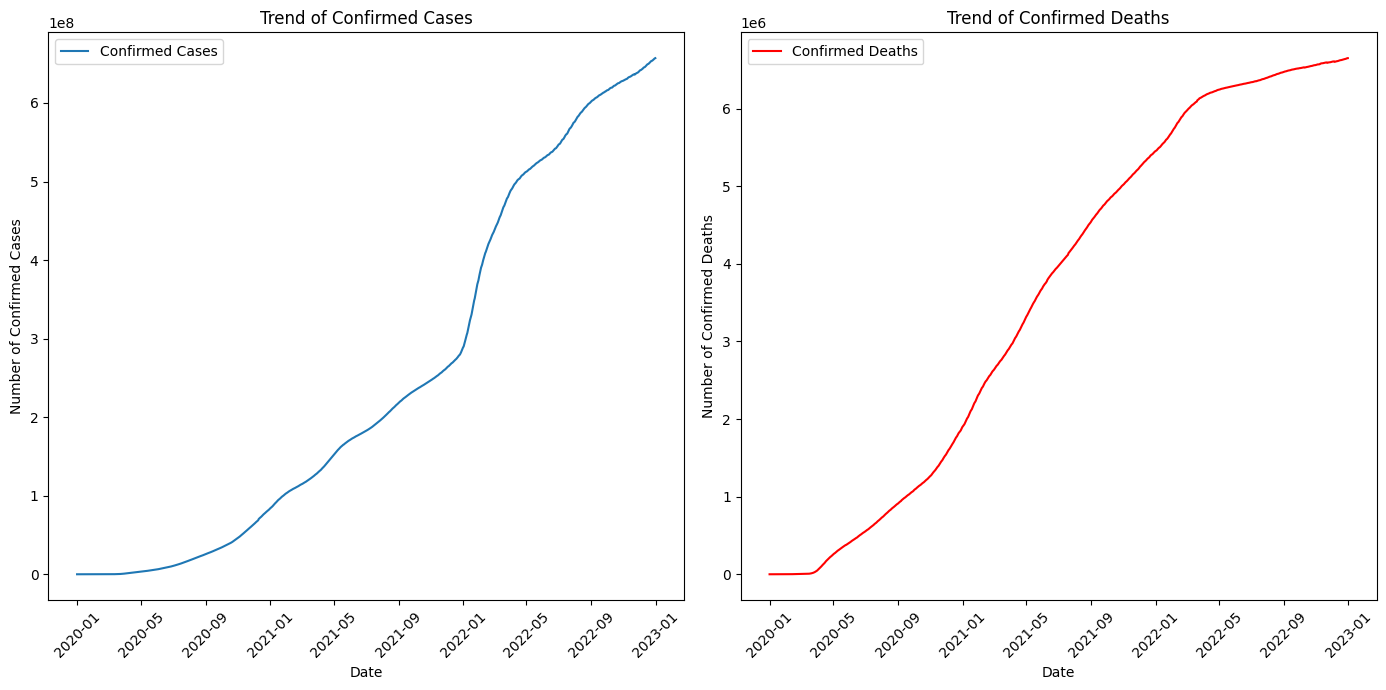

In [ ]:
# Aggregating data by date
df_agg_date = df.groupby('Date').agg(aggregation_funcs)

# Plotting ConfirmedCases and ConfirmedDeaths
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(df_agg_date.index, df_agg_date['ConfirmedCases'], label='Confirmed Cases')
plt.title('Trend of Confirmed Cases')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases')
plt.xticks(rotation=45)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(df_agg_date.index, df_agg_date['ConfirmedDeaths'], label='Confirmed Deaths', color='red')
plt.title('Trend of Confirmed Deaths')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Deaths')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
print('The total number of covid-19 cases in our dataset are {}'.format(df_agg_date['ConfirmedCases'].iloc[-1]))

The total number of covid-19 cases in our dataset are 657048606.0


In [ ]:
df_agg_date.describe()

CountryCode  C1M_School closing  C2M_Workplace closing  \
count  1096.000000         1096.000000            1096.000000   
mean    175.805657          220.099453             210.962591   
std      30.959564          140.518330             103.730752   
min       4.000000            0.000000               0.000000   
25%     183.000000           69.000000             103.500000   
50%     184.000000          220.500000             248.000000   
75%     184.000000          310.000000             285.000000   
max     184.000000          534.000000             433.000000   

       C3M_Cancel public events  C4M_Restrictions on gatherings  \
count               1096.000000                     1096.000000   
mean                 202.878650                      370.468978   
std                   99.298466                      207.379191   
min                    0.000000                        0.000000   
25%                  100.000000                      135.000000   
50%                  245.000000                      484.500000   
75%                  276.000000                      546.250000   
max                  355.000000                      607.000000   

       C5M_Close public transport  C6M_Stay at home requirements  \
count                 1096.000000                    1096.000000   
mean                    77.732664                     136.912409   
std                     49.860615                      91.518382   
min                      0.000000                       0.000000   
25%                     25.750000                      28.750000   
50%                     91.000000                     177.000000   
75%                    107.000000                     207.000000   
max                    216.000000                     327.000000   

       C7M_Restrictions on internal movement  \
count                            1096.000000   
mean                              106.972628   
std                                73.828254   
min                                 0.000000   
25%                                27.000000   
50%                               125.000000   
75%                               157.000000   
max                               298.000000   

       C8EV_International travel controls  E1_Income support  ...  \
count                         1096.000000        1096.000000  ...   
mean                           339.803832         123.203467  ...   
std                            178.640607          54.702012  ...   
min                              1.000000           0.000000  ...   
25%                            167.000000          79.000000  ...   
50%                            362.500000         131.500000  ...   
75%                            461.000000         169.000000  ...   
max                            666.000000         192.000000  ...   

       V2F_Frontline workers  (non healthcare)  \
count                              1096.000000   
mean                                201.668796   
std                                 159.237541   
min                                   0.000000   
25%                                   0.000000   
50%                                 310.000000   
75%                                 350.000000   
max                                 357.000000   

       V2G_Frontline workers  (healthcare)  \
count                          1096.000000   
mean                            207.394161   
std                             156.010056   
min                               0.000000   
25%                               0.000000   
50%                             299.000000   
75%                             349.000000   
max                             354.000000   

       V3_Vaccine Financial Support (summary)  \
count                             1096.000000   
mean                               568.876825   
std                                415.113851   
min                                  0.000000   
25%                                  2

In [ ]:
df_agg_date.tail()
df_monthly = df_agg_date.resample('M').mean()
df_monthly.head(25)
#df_monthly.tail(25)

CountryCode  C1M_School closing  C2M_Workplace closing  \
Date                                                                 
2020-01-31    21.903226            2.419355               1.129032   
2020-02-29    89.655172           25.724138              10.482759   
2020-03-31   161.258065          298.096774             167.645161   
2020-04-30   184.000000          528.300000             418.466667   
2020-05-31   184.000000          491.709677             355.032258   
2020-06-30   184.000000          426.333333             289.366667   
2020-07-31   184.000000          393.709677             268.290323   
2020-08-31   184.000000          389.903226             285.483871   
2020-09-30   184.000000          346.166667             275.700000   
2020-10-31   184.000000          311.516129             261.290323   
2020-11-30   184.000000          302.300000             271.600000   
2020-12-31   184.000000          315.064516             286.677419   
2021-01-31   184.000000          329.935484             296.322581   
2021-02-28   184.000000          302.142857             292.214286   
2021-03-31   184.000000          287.354839             301.806452   
2021-04-30   183.400000          286.033333             306.633333   
2021-05-31   183.419355          263.064516             293.806452   
2021-06-30   183.700000          262.333333             278.300000   
2021-07-31   184.000000          254.096774             266.548387   
2021-08-31   184.000000          239.903226             254.193548   
2021-09-30   184.000000          217.066667             248.566667   
2021-10-31   184.000000          193.774194             231.709677   
2021-11-30   184.000000          183.966667             223.866667   
2021-12-31   184.000000          186.290323             220.161290   
2022-01-31   184.000000          192.806452             234.870968   

            C3M_Cancel public events  C4M_Restrictions on gatherings  \
Date                                                                   
2020-01-31                  1.741935                        1.225806   
2020-02-29                 14.758621                        8.551724   
2020-03-31                202.161290                      262.000000   
2020-04-30                351.333333                      596.566667   
2020-05-31                343.516129                      596.096774   
2020-06-30                306.200000                      520.733333   
2020-07-31                277.903226                      491.000000   
2020-08-31                273.483871                      501.677419   
2020-09-30                272.066667                      502.233333   
2020-10-31                266.709677                      520.645161   
2020-11-30                268.966667                      540.166667   
2020-12-31                276.258065                      549.612903   
2021-01-31                278.838710                      561.064516   
2021-02-28                278.750000                      563.071429   
2021-03-31                284.967742                      566.354839   
2021-04-30                285.733333                      568.333333   
2021-05-31                276.612903                      562.709677   
2021-06-30                264.266667                      549.233333   
2021-07-31                254.451613                      531.193548   
2021-08-31                245.096774                      517.451613   
2021-09-30                246.800000                      488.133333   
2021-10-31                241.032258                      459.741935   
2021-11-30                229.833333                      431.833333   
2021-12-31                222.612903                      426.548387   
2022-01-31                223.290323                      427.548387   

            C5M_Close public transport  C6M_Stay at home requirements  \
Date                                                                    
2020-01-31                    

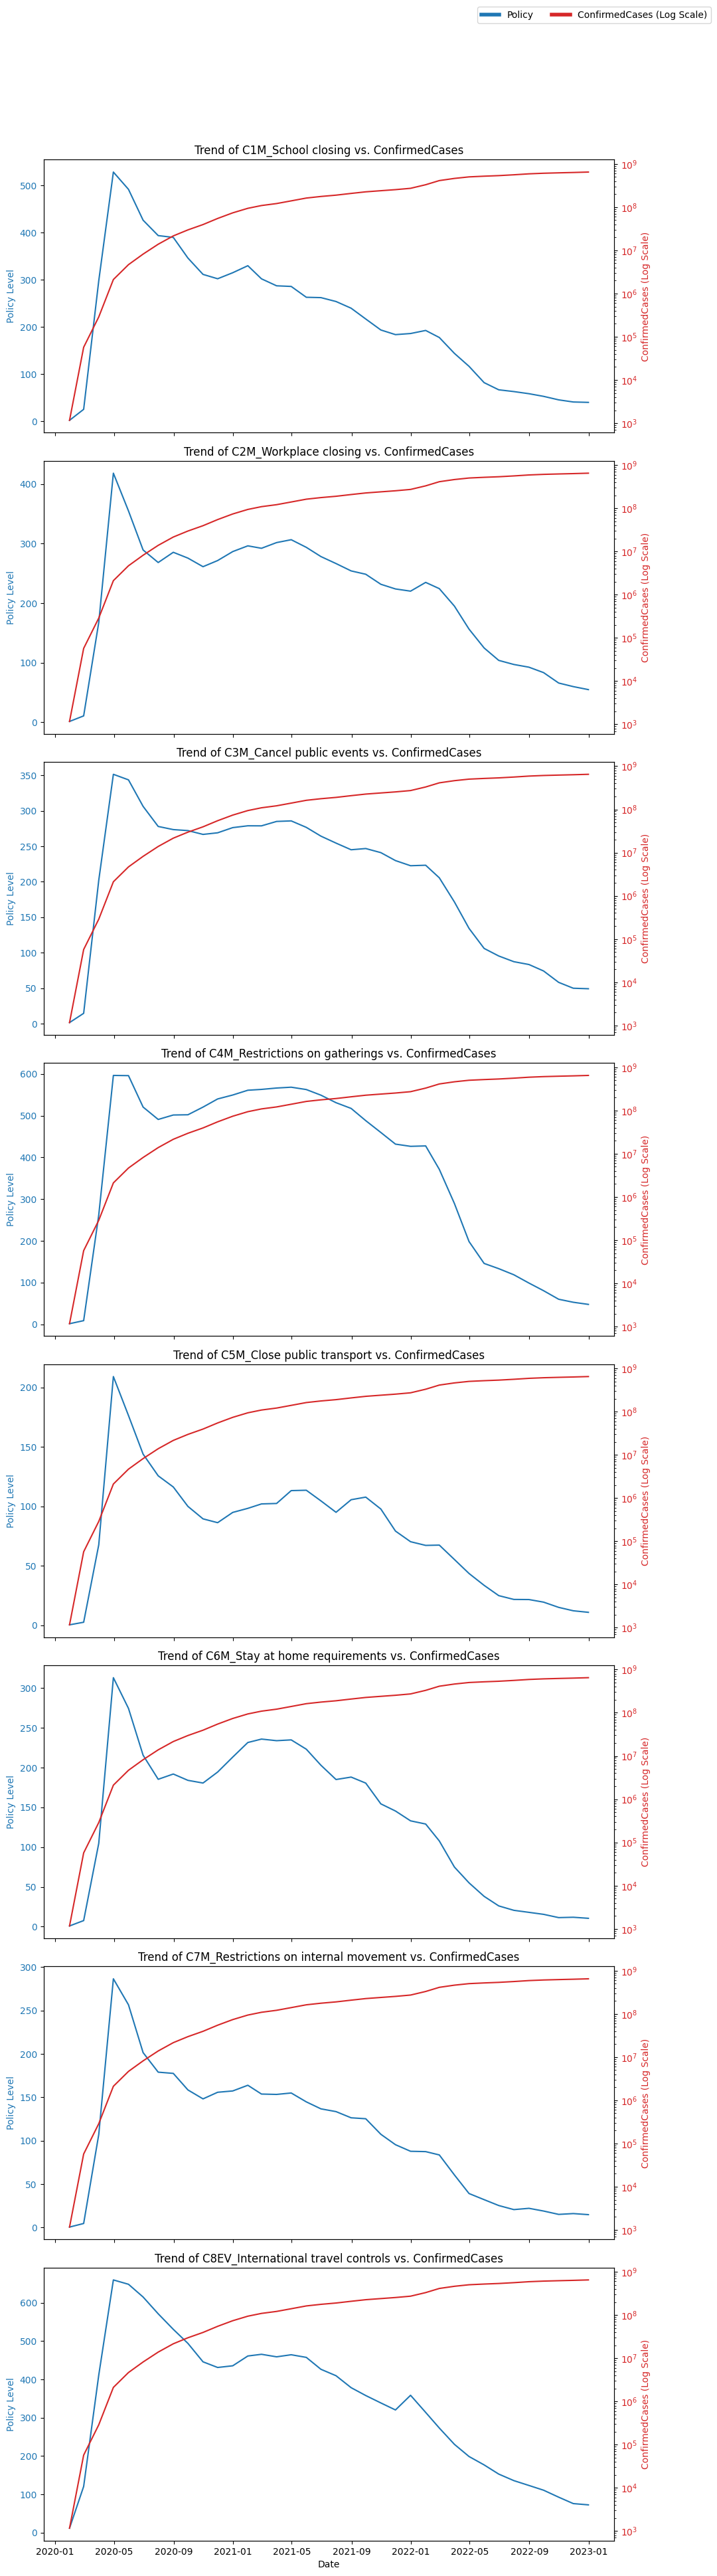

In [ ]:
containment_policy_columns = ['C1M_School closing', 'C2M_Workplace closing', 'C3M_Cancel public events',
                  'C4M_Restrictions on gatherings', 'C5M_Close public transport',
                  'C6M_Stay at home requirements', 'C7M_Restrictions on internal movement',
                  'C8EV_International travel controls']

fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(10, 40), sharex=True)

for i, policy in enumerate(containment_policy_columns):
    sns.lineplot(ax=axes[i], data=df_monthly, x=df_monthly.index, y=policy, color='tab:blue')
    axes[i].set_ylabel('Policy Level', color='tab:blue')
    axes[i].tick_params(axis='y', labelcolor='tab:blue')

    ax2 = axes[i].twinx()
    sns.lineplot(ax=ax2, data=df_monthly, x=df_monthly.index, y='ConfirmedCases', color='tab:red')
    ax2.set_yscale('log')
    ax2.set_ylabel('ConfirmedCases (Log Scale)', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')
    axes[i].set_title(f'Trend of {policy} vs. ConfirmedCases')


custom_lines = [Line2D([0], [0], color='tab:blue', lw=4),
                Line2D([0], [0], color='tab:red', lw=4)]


fig.legend(custom_lines, ['Policy', 'ConfirmedCases (Log Scale)'], loc='upper center', ncol=2, bbox_to_anchor=(0.9, 1))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



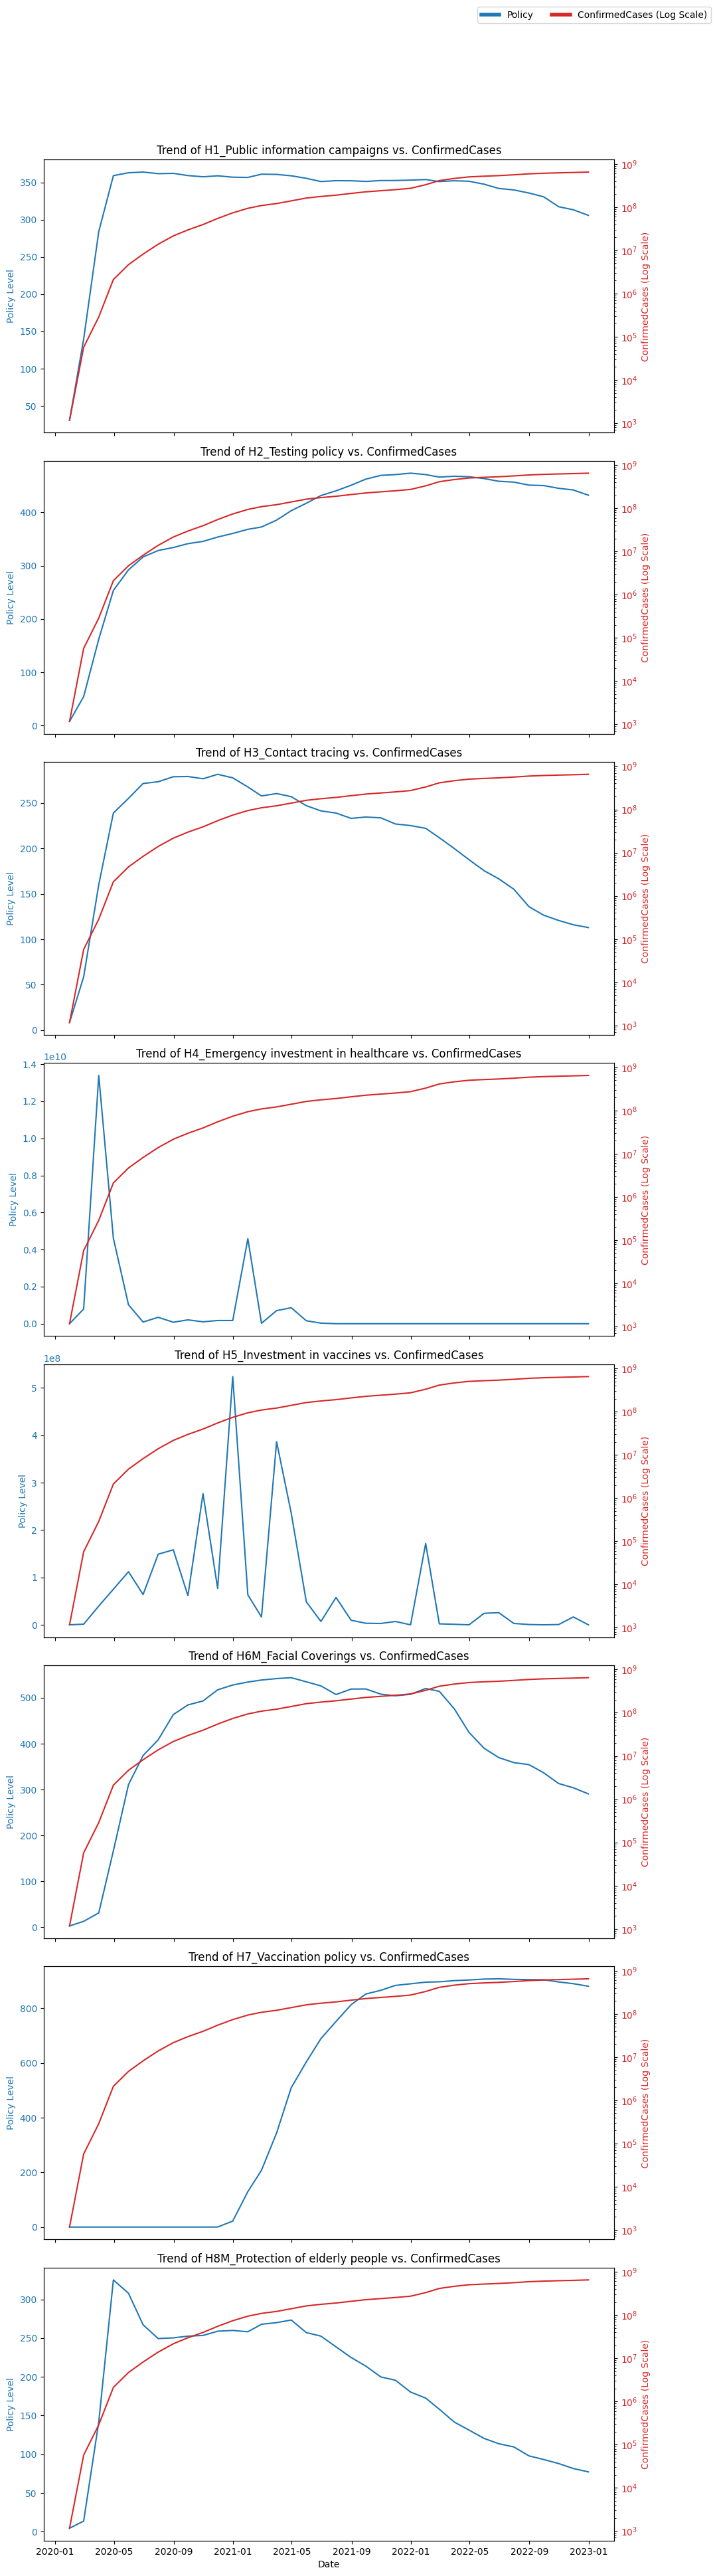

In [ ]:
health_policy_columns = ['H1_Public information campaigns', 'H2_Testing policy', 'H3_Contact tracing', 'H4_Emergency investment in healthcare', 'H5_Investment in vaccines', 'H6M_Facial Coverings', 'H7_Vaccination policy', 'H8M_Protection of elderly people']

fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(10, 40), sharex=True)

for i, policy in enumerate(health_policy_columns):
    sns.lineplot(ax=axes[i], data=df_monthly, x=df_monthly.index, y=policy, color='tab:blue')
    axes[i].set_ylabel('Policy Level', color='tab:blue')
    axes[i].tick_params(axis='y', labelcolor='tab:blue')

    ax2 = axes[i].twinx()
    sns.lineplot(ax=ax2, data=df_monthly, x=df_monthly.index, y='ConfirmedCases', color='tab:red')
    ax2.set_yscale('log')
    ax2.set_ylabel('ConfirmedCases (Log Scale)', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')
    axes[i].set_title(f'Trend of {policy} vs. ConfirmedCases')



custom_lines = [Line2D([0], [0], color='tab:blue', lw=4),
                Line2D([0], [0], color='tab:red', lw=4)]


fig.legend(custom_lines, ['Policy', 'ConfirmedCases (Log Scale)'], loc='upper center', ncol=2, bbox_to_anchor=(0.9, 1))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()





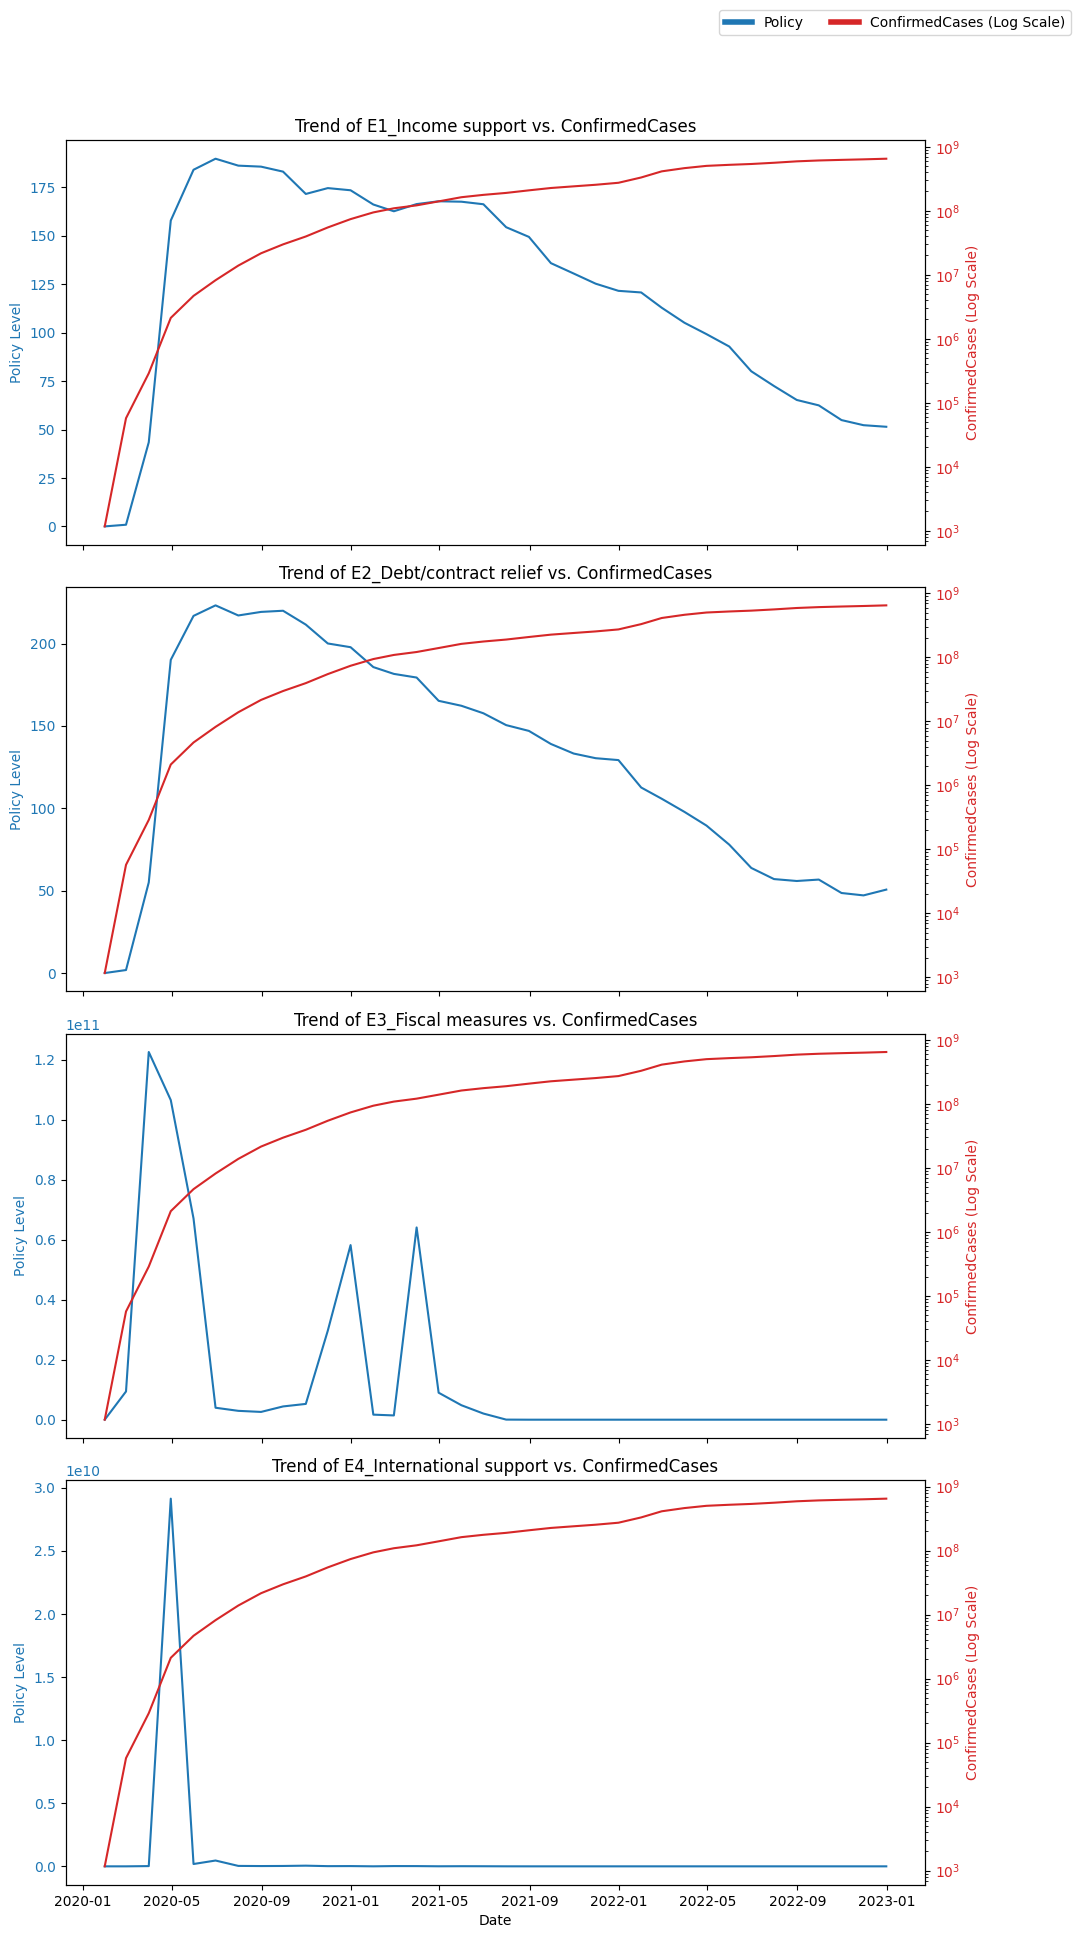

In [ ]:
economic_policy_columns = ['E1_Income support','E2_Debt/contract relief', 'E3_Fiscal measures', 'E4_International support']
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 20), sharex=True)

# Iterate over policies and create a line plot for each
for i, policy in enumerate(economic_policy_columns):
    sns.lineplot(ax=axes[i], data=df_monthly, x=df_monthly.index, y=policy, color='tab:blue')
    axes[i].set_ylabel('Policy Level', color='tab:blue')
    axes[i].tick_params(axis='y', labelcolor='tab:blue')

    # Create a secondary y-axis for confirmed cases with log scale
    ax2 = axes[i].twinx()
    sns.lineplot(ax=ax2, data=df_monthly, x=df_monthly.index, y='ConfirmedCases', color='tab:red')
    ax2.set_yscale('log')
    ax2.set_ylabel('ConfirmedCases (Log Scale)', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')
    axes[i].set_title(f'Trend of {policy} vs. ConfirmedCases')


# Create custom lines for the legend
custom_lines = [Line2D([0], [0], color='tab:blue', lw=4),
                Line2D([0], [0], color='tab:red', lw=4)]


fig.legend(custom_lines, ['Policy', 'ConfirmedCases (Log Scale)'], loc='upper center', ncol=2, bbox_to_anchor=(0.9, 1))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
df_monthly.head(1)

CountryCode  C1M_School closing  C2M_Workplace closing  \
Date                                                                 
2020-01-31    21.903226            2.419355               1.129032   

            C3M_Cancel public events  C4M_Restrictions on gatherings  \
Date                                                                   
2020-01-31                  1.741935                        1.225806   

            C5M_Close public transport  C6M_Stay at home requirements  \
Date                                                                    
2020-01-31                    0.451613                        0.83871   

            C7M_Restrictions on internal movement  \
Date                                                
2020-01-31                               0.451613   

            C8EV_International travel controls  E1_Income support  ...  \
Date                                                               ...   
2020-01-31                           11.548387                0.0  ...   

            V2F_Frontline workers  (non healthcare)  \
Date                                                  
2020-01-31                                      0.0   

            V2G_Frontline workers  (healthcare)  \
Date                                              
2020-01-31                                  0.0   

            V3_Vaccine Financial Support (summary)  \
Date                                                 
2020-01-31                                0.258065   

            V4_Mandatory Vaccination (summary)  ConfirmedCases  \
Date                                                             
2020-01-31                                 0.0     1166.516129   

            ConfirmedDeaths  StringencyIndex_Average  \
Date                                                   
2020-01-31        26.741935                   232.47   

            GovernmentResponseIndex_Average  ContainmentHealthIndex_Average  \
Date                                                                          
2020-01-31                       186.363548                      212.984194   

            EconomicSupportIndex  
Date                              
2020-01-31                   0.0  

[1 rows x 39 columns]

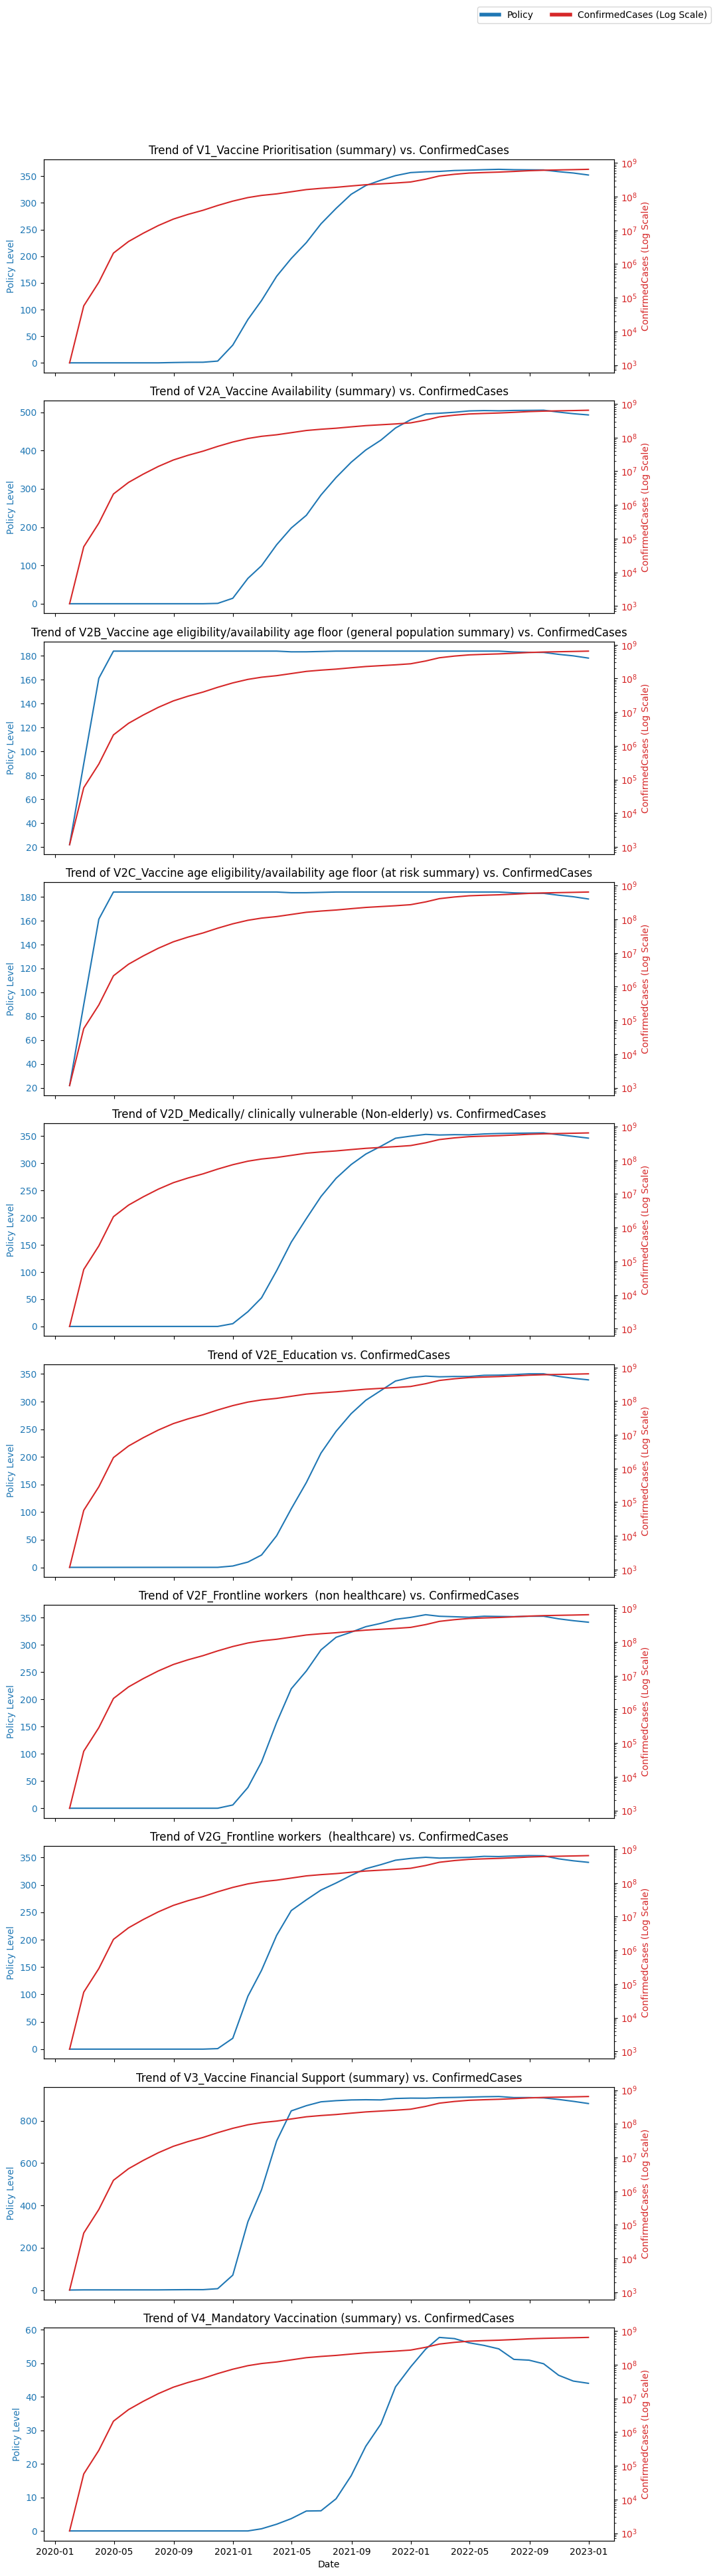

In [ ]:
vaccination_policy_columns = ['V1_Vaccine Prioritisation (summary)', 'V2A_Vaccine Availability (summary)', 'V2B_Vaccine age eligibility/availability age floor (general population summary)','V2C_Vaccine age eligibility/availability age floor (at risk summary)','V2D_Medically/ clinically vulnerable (Non-elderly)', 'V2E_Education','V2F_Frontline workers  (non healthcare)', 'V2G_Frontline workers  (healthcare)', 'V3_Vaccine Financial Support (summary)', 'V4_Mandatory Vaccination (summary)']
fig, axes = plt.subplots(nrows=len(vaccination_policy_columns), ncols=1, figsize=(10, 40), sharex=True)

# Iterate over policies and create a line plot for each
for i, policy in enumerate(vaccination_policy_columns):
    sns.lineplot(ax=axes[i], data=df_monthly, x=df_monthly.index, y=policy, color='tab:blue')
    axes[i].set_ylabel('Policy Level', color='tab:blue')
    axes[i].tick_params(axis='y', labelcolor='tab:blue')

    # Create a secondary y-axis for confirmed cases with log scale
    ax2 = axes[i].twinx()
    sns.lineplot(ax=ax2, data=df_monthly, x=df_monthly.index, y='ConfirmedCases', color='tab:red')
    ax2.set_yscale('log')
    ax2.set_ylabel('ConfirmedCases (Log Scale)', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')
    axes[i].set_title(f'Trend of {policy} vs. ConfirmedCases')


# Create custom lines for the legend
custom_lines = [Line2D([0], [0], color='tab:blue', lw=4),
                Line2D([0], [0], color='tab:red', lw=4)]


fig.legend(custom_lines, ['Policy', 'ConfirmedCases (Log Scale)'], loc='upper center', ncol=2, bbox_to_anchor=(0.9, 1))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

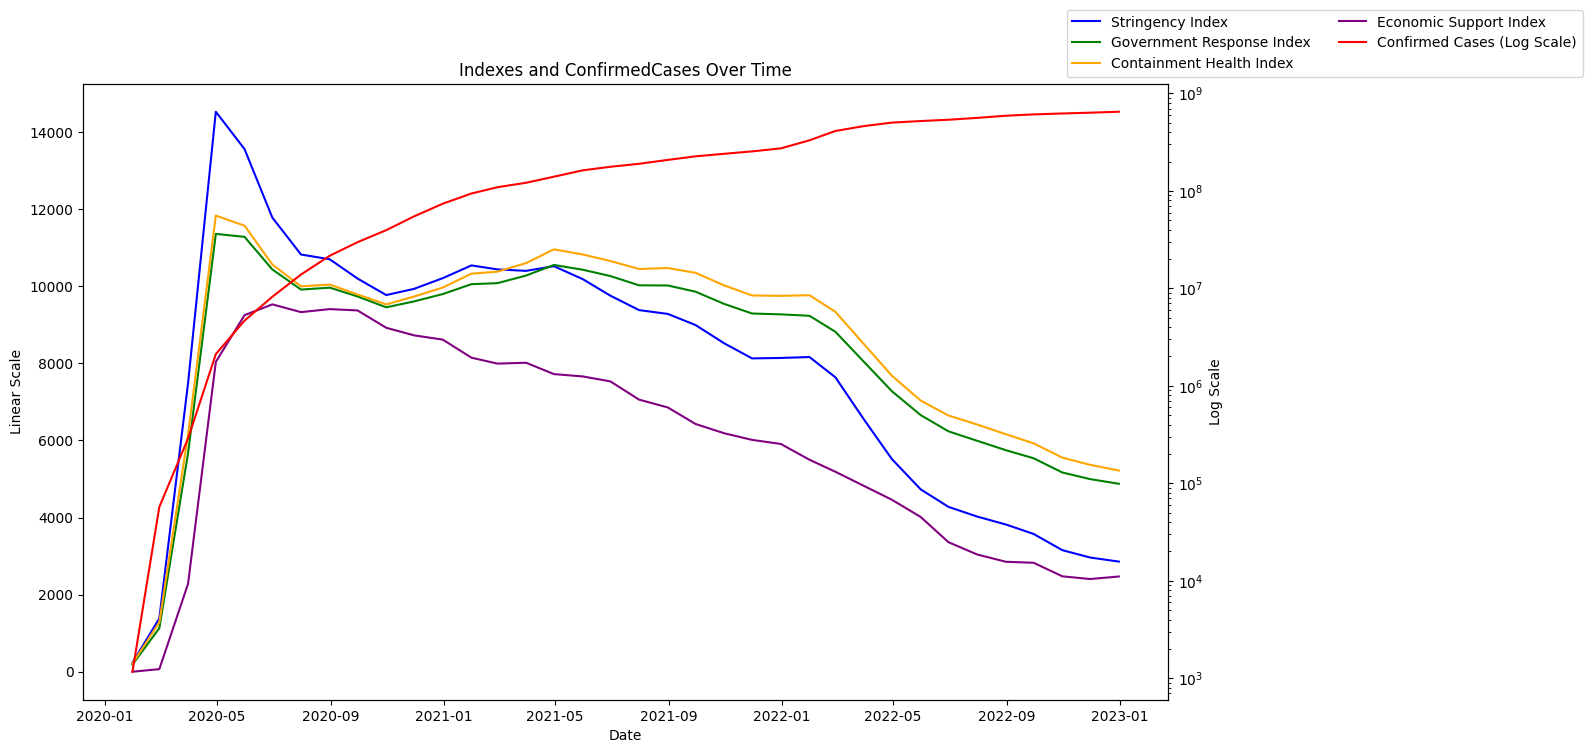

In [ ]:
fig, ax1 = plt.subplots(figsize=(14, 8))

colors = ['blue', 'green', 'orange', 'purple', 'red']

sns.lineplot(x='Date', y='StringencyIndex_Average', data=df_monthly, color=colors[0], ax=ax1, label='Stringency Index', legend=None)
sns.lineplot(x='Date', y='GovernmentResponseIndex_Average', data=df_monthly, color=colors[1], ax=ax1, label='Government Response Index', legend=None)
sns.lineplot(x='Date', y='ContainmentHealthIndex_Average', data=df_monthly, color=colors[2], ax=ax1, label='Containment Health Index', legend=None)
sns.lineplot(x='Date', y='EconomicSupportIndex', data=df_monthly, color=colors[3], ax=ax1, label='Economic Support Index', legend=None)

ax1.set_title('Indexes and ConfirmedCases Over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Linear Scale')

ax2 = ax1.twinx()
sns.lineplot(x='Date', y='ConfirmedCases', data=df_monthly, color=colors[4], ax=ax2, label='Confirmed Cases (Log Scale)', legend=None)
ax2.set_ylabel('Log Scale')
ax2.set_yscale('log')


lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='best', ncol=2, bbox_to_anchor=(0.9, 1))

plt.show()

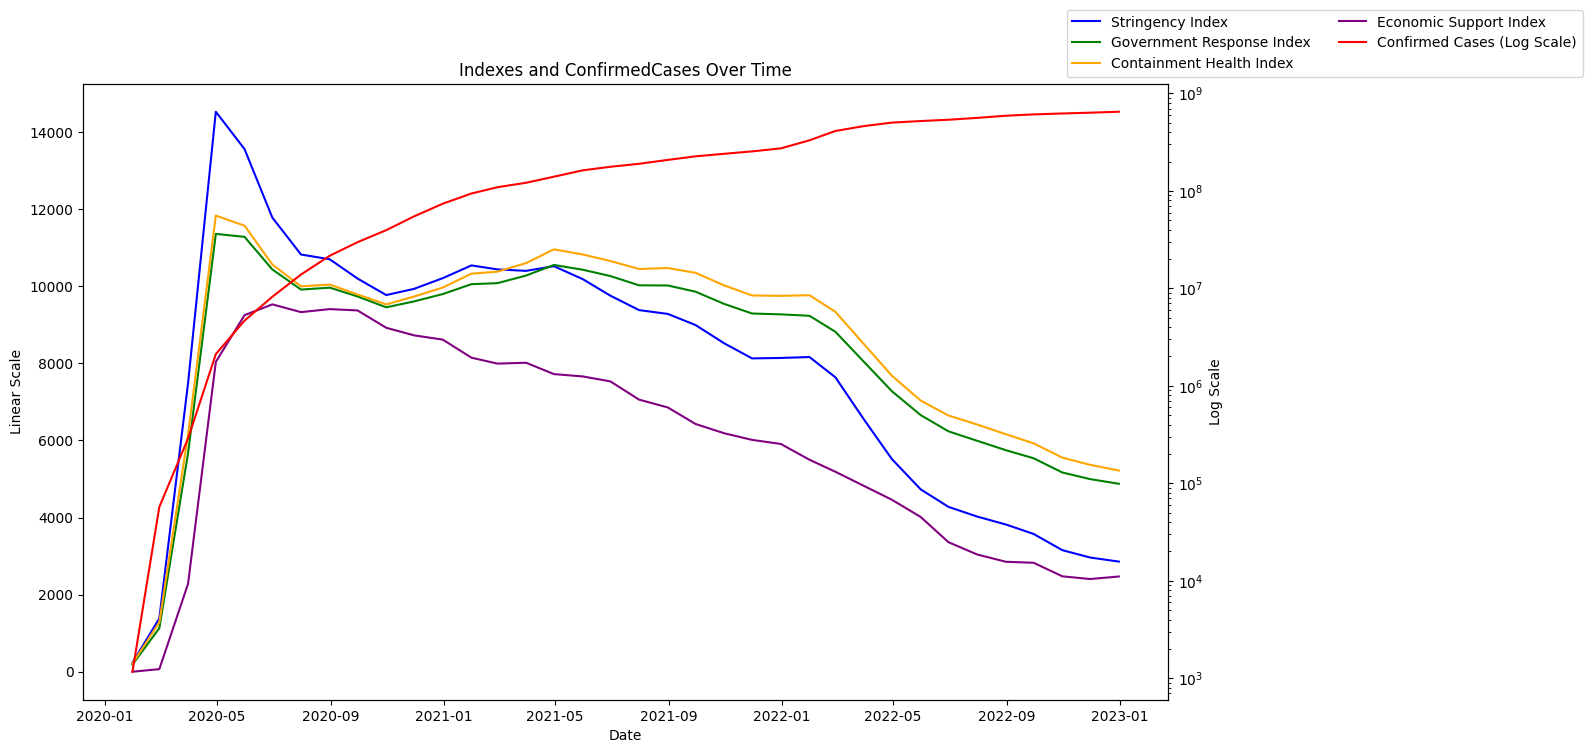

In [ ]:
fig, ax1 = plt.subplots(figsize=(14, 8))

colors = ['blue', 'green', 'orange', 'purple', 'red']

sns.lineplot(x='Date', y='StringencyIndex_Average', data=df_monthly, color=colors[0], ax=ax1, label='Stringency Index', legend=None)
sns.lineplot(x='Date', y='GovernmentResponseIndex_Average', data=df_monthly, color=colors[1], ax=ax1, label='Government Response Index', legend=None)
sns.lineplot(x='Date', y='ContainmentHealthIndex_Average', data=df_monthly, color=colors[2], ax=ax1, label='Containment Health Index', legend=None)
sns.lineplot(x='Date', y='EconomicSupportIndex', data=df_monthly, color=colors[3], ax=ax1, label='Economic Support Index', legend=None)

ax1.set_title('Indexes and ConfirmedCases Over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Linear Scale')

ax2 = ax1.twinx()
sns.lineplot(x='Date', y='ConfirmedCases', data=df_monthly, color=colors[4], ax=ax2, label='Confirmed Cases (Log Scale)', legend=None)
ax2.set_ylabel('Log Scale')
ax2.set_yscale('log')


lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='best', ncol=2, bbox_to_anchor=(0.9, 1))

plt.show()

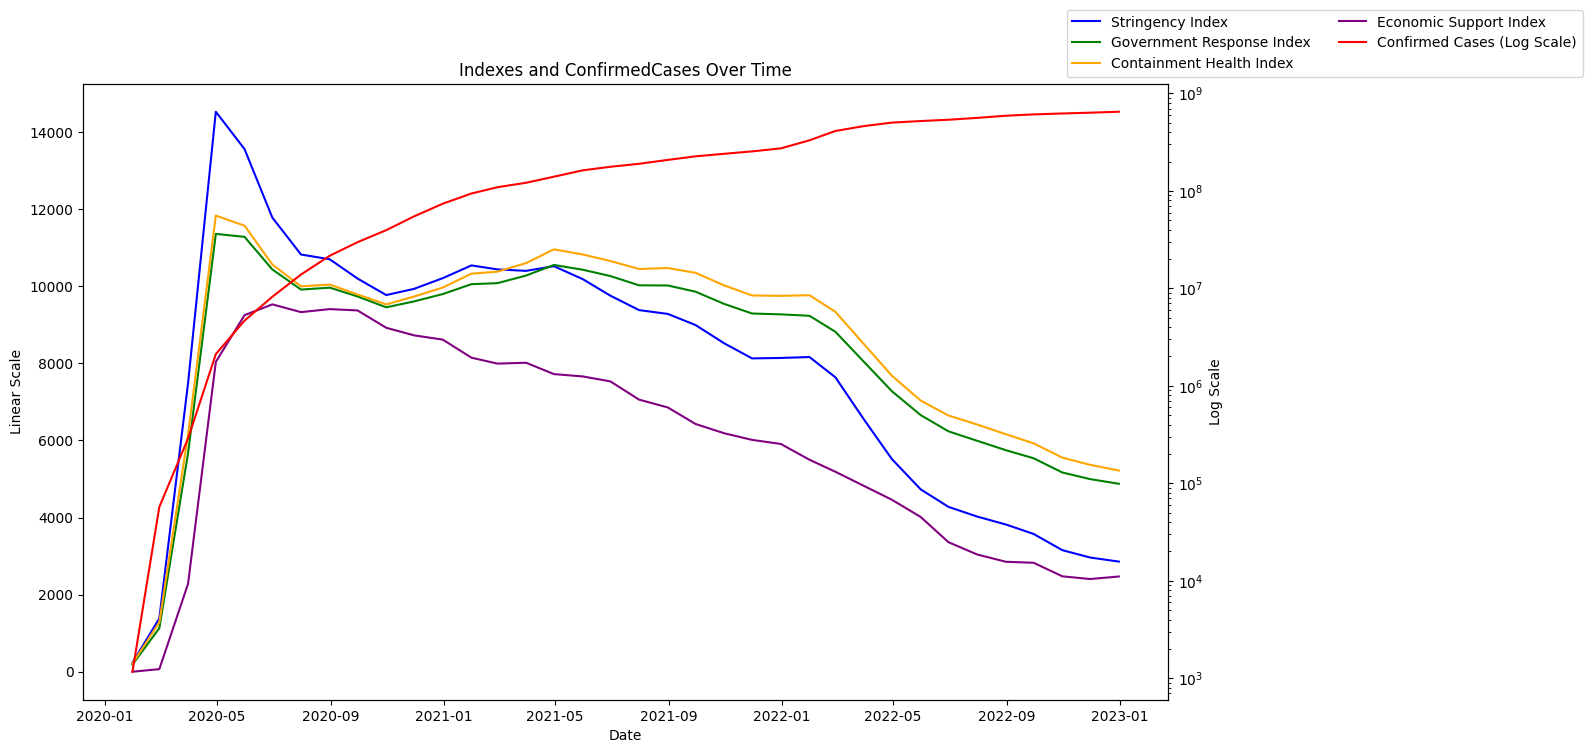

In [ ]:
fig, ax1 = plt.subplots(figsize=(14, 8))

colors = ['blue', 'green', 'orange', 'purple', 'red']

sns.lineplot(x='Date', y='StringencyIndex_Average', data=df_monthly, color=colors[0], ax=ax1, label='Stringency Index', legend=None)
sns.lineplot(x='Date', y='GovernmentResponseIndex_Average', data=df_monthly, color=colors[1], ax=ax1, label='Government Response Index', legend=None)
sns.lineplot(x='Date', y='ContainmentHealthIndex_Average', data=df_monthly, color=colors[2], ax=ax1, label='Containment Health Index', legend=None)
sns.lineplot(x='Date', y='EconomicSupportIndex', data=df_monthly, color=colors[3], ax=ax1, label='Economic Support Index', legend=None)

ax1.set_title('Indexes and ConfirmedCases Over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Linear Scale')

ax2 = ax1.twinx()
sns.lineplot(x='Date', y='ConfirmedCases', data=df_monthly, color=colors[4], ax=ax2, label='Confirmed Cases (Log Scale)', legend=None)
ax2.set_ylabel('Log Scale')
ax2.set_yscale('log')


lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='best', ncol=2, bbox_to_anchor=(0.9, 1))

plt.show()

#### EDA 2

In [ ]:
aggregation_funcs_for_clustering = {}

for column in df.columns:
    if column == 'CountryCode' or pd.api.types.is_datetime64_dtype(df[column]):
      continue
    elif pd.api.types.is_categorical_dtype(df[column]):
      aggregation_funcs_for_clustering[column] = 'count'
    else:
      aggregation_funcs_for_clustering[column] = 'sum'

<ipython-input-98-bb0c1e240f34>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


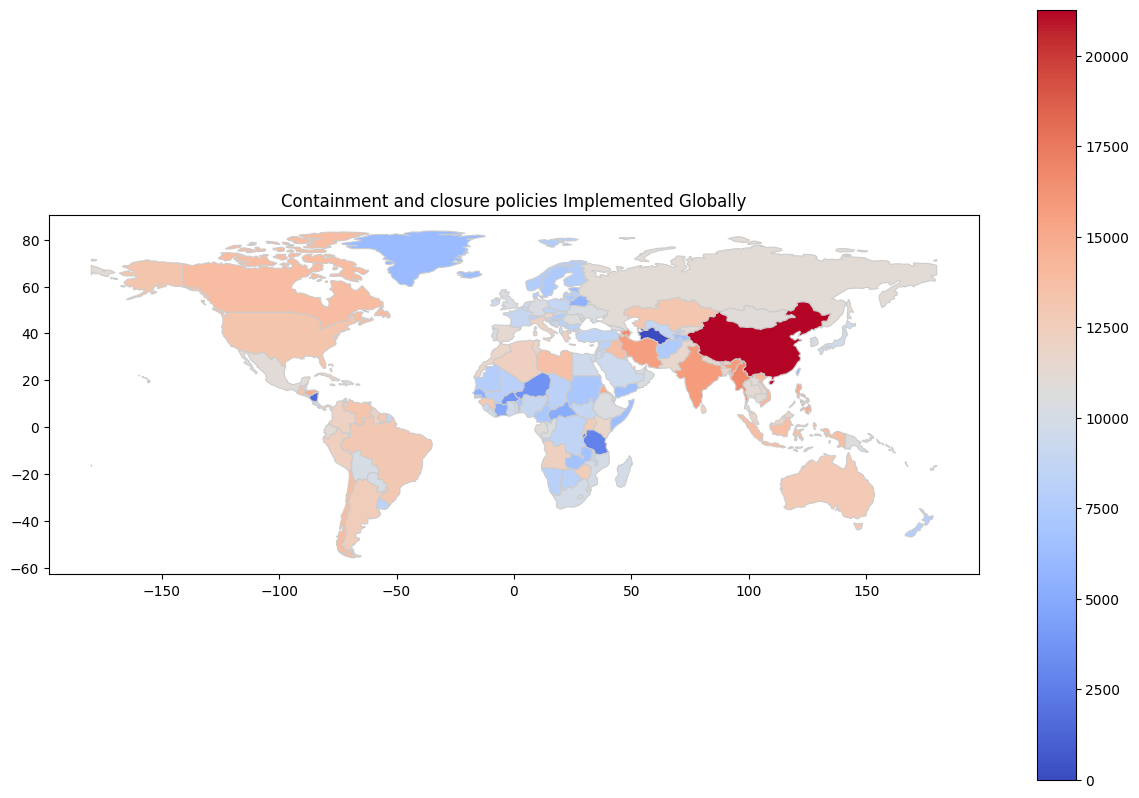

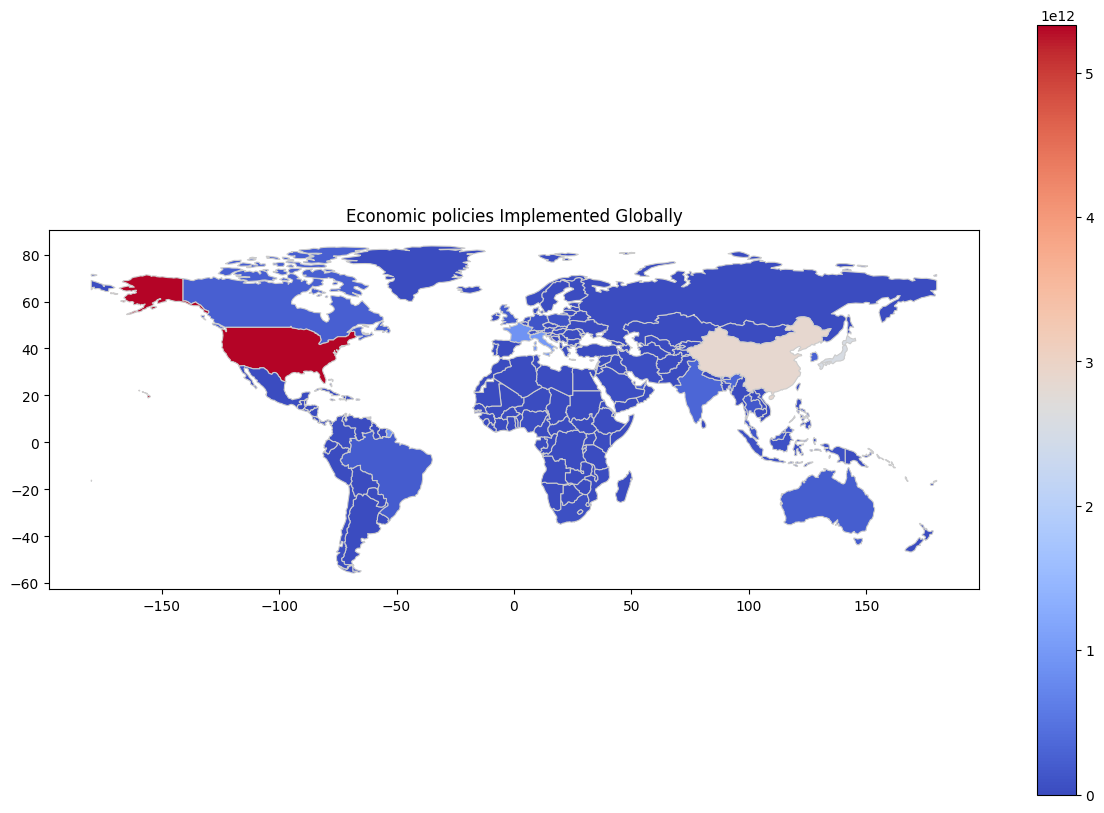

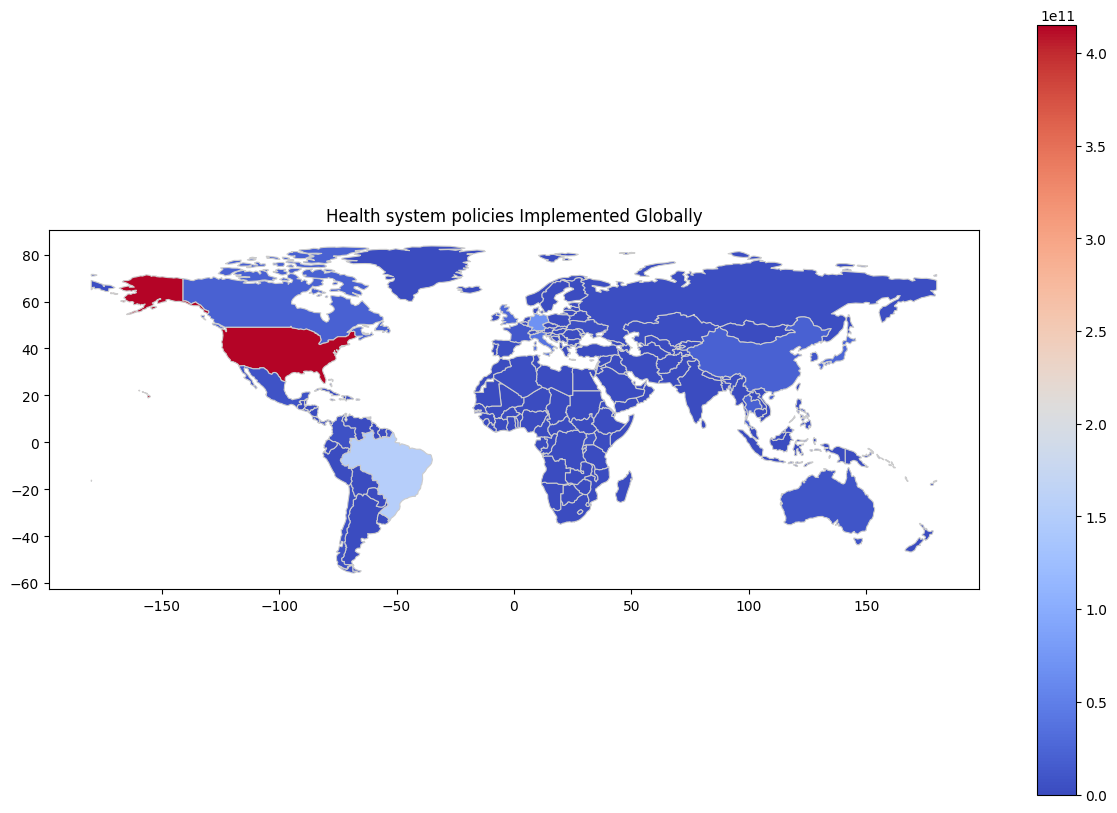

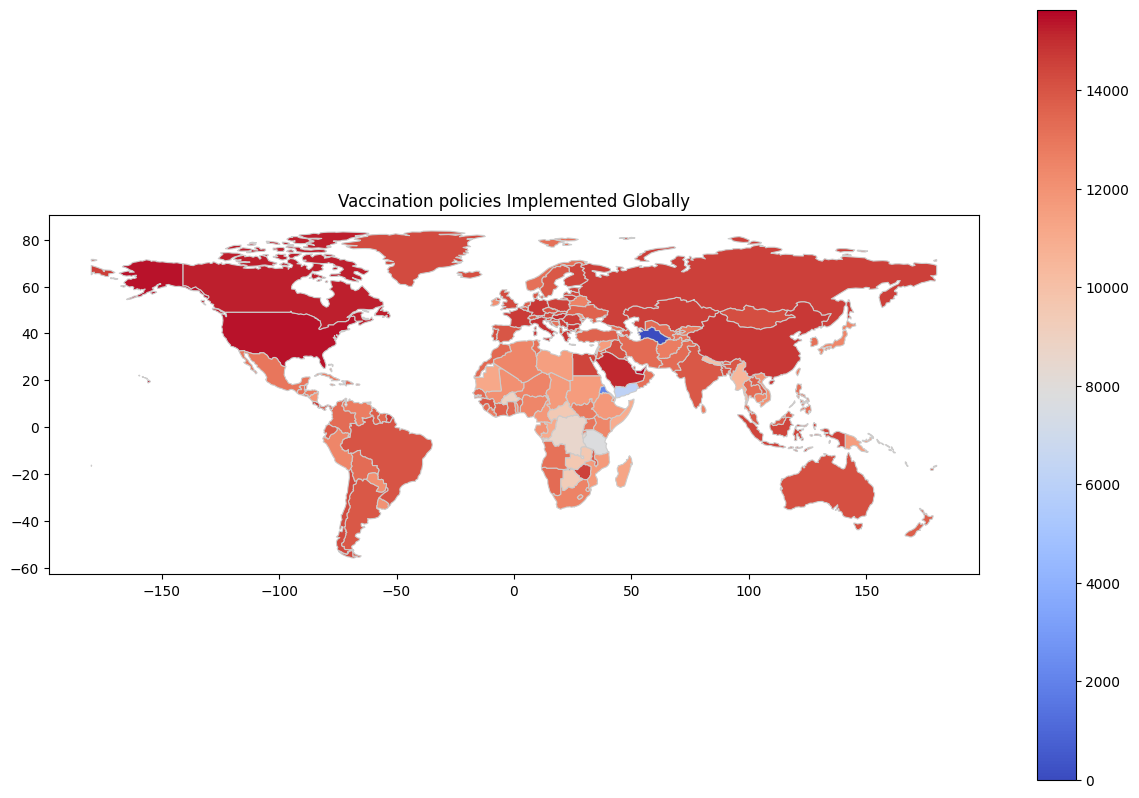

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

df2 = df.groupby('CountryCode').agg(aggregation_funcs_for_clustering)


df2['policy_c'] = df2[containment_policy_columns].sum(axis=1)
df2['policy_e'] = df2[economic_policy_columns].sum(axis=1)
df2['policy_h'] = df2[health_policy_columns].sum(axis=1)
df2['policy_v'] = df2[vaccination_policy_columns].sum(axis=1)

world = world.merge(df2, left_on='iso_a3', right_on='CountryCode')

policy_dict = {
    'c': ['policy_c', 'Containment and closure policies'],
    'e': ['policy_e', 'Economic policies'],
    'h': ['policy_h', 'Health system policies'],
    'v': ['policy_v', 'Vaccination policies']
}

for key, value in policy_dict.items():
  fig, ax = plt.subplots(1, 1, figsize=(15, 10))
  world.plot(column = policy_dict[key][0], cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, aspect='equal')
  ax.set_title(f'{policy_dict[key][1]} Implemented Globally')
  plt.show()


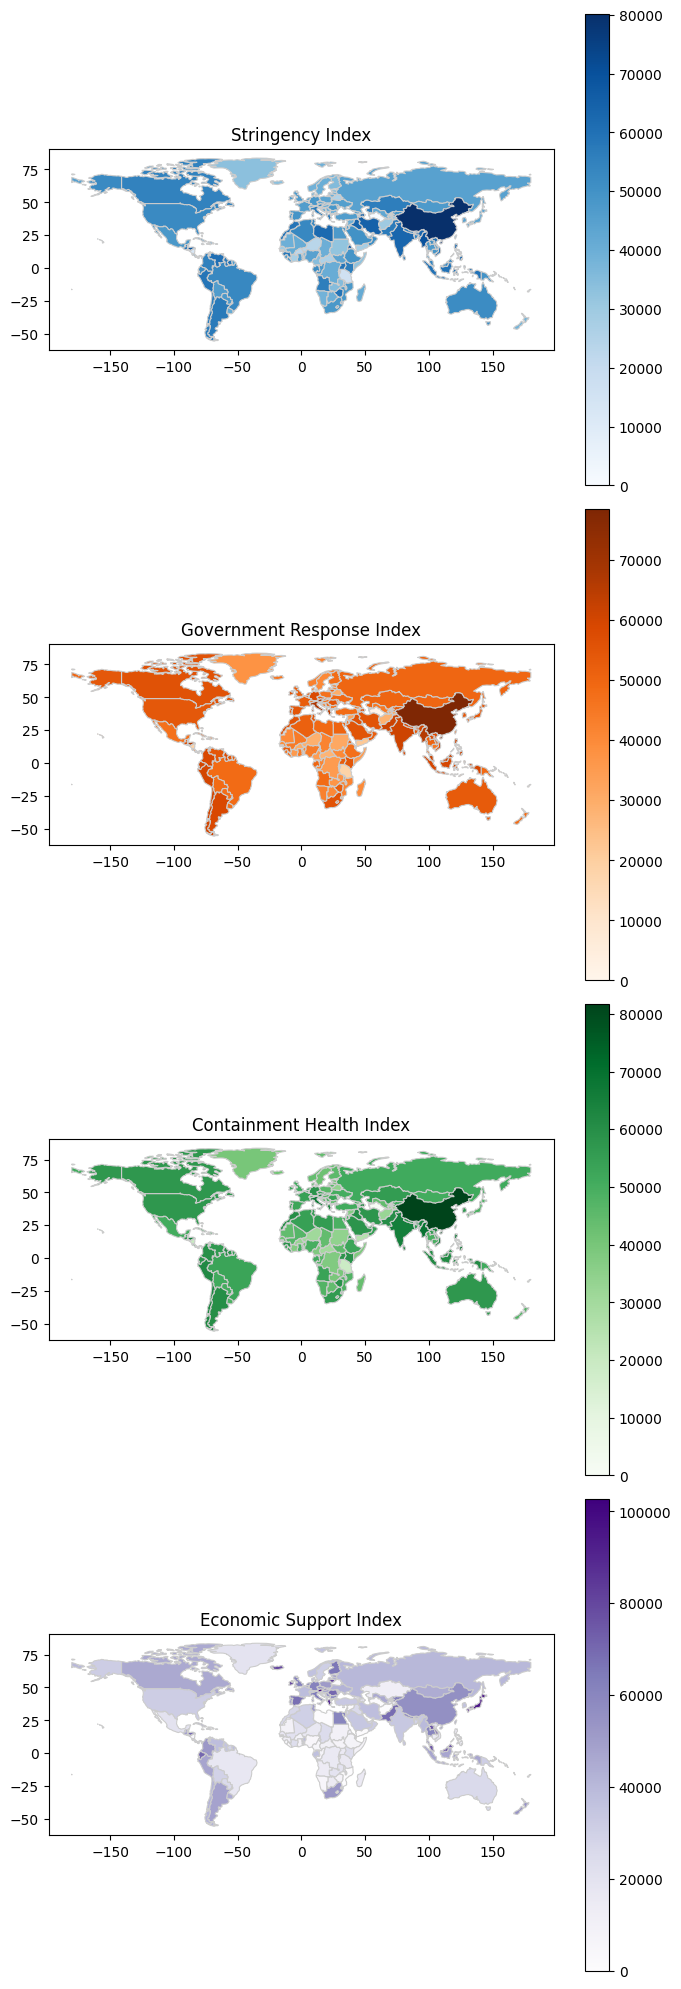

In [ ]:
fig, axs = plt.subplots(4, 1, figsize=(7, 20))

world.plot(column='StringencyIndex_Average', cmap='Blues', linewidth=0.8, ax=axs[0], edgecolor='0.8', legend=True)
axs[0].set_title('Stringency Index')

world.plot(column='GovernmentResponseIndex_Average', cmap='Oranges', linewidth=0.8, ax=axs[1], edgecolor='0.8', legend=True)
axs[1].set_title('Government Response Index')

world.plot(column='ContainmentHealthIndex_Average', cmap='Greens', linewidth=0.8, ax=axs[2], edgecolor='0.8', legend=True)
axs[2].set_title('Containment Health Index')

world.plot(column='EconomicSupportIndex', cmap='Purples', linewidth=0.8, ax=axs[3], edgecolor='0.8', legend=True)
axs[3].set_title('Economic Support Index')

plt.tight_layout()
plt.show()


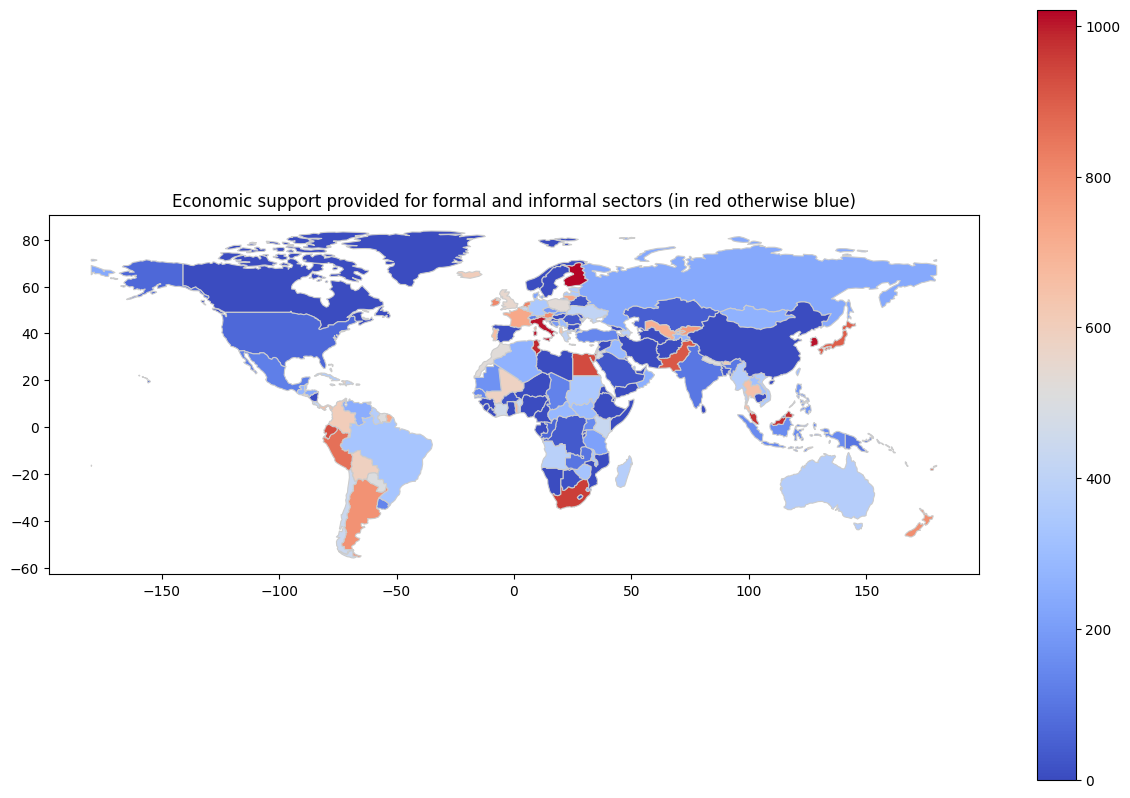

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='E1_Flag', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, aspect='equal')
ax.set_title('Economic support provided for formal and informal sectors (in red otherwise blue)')
plt.show()

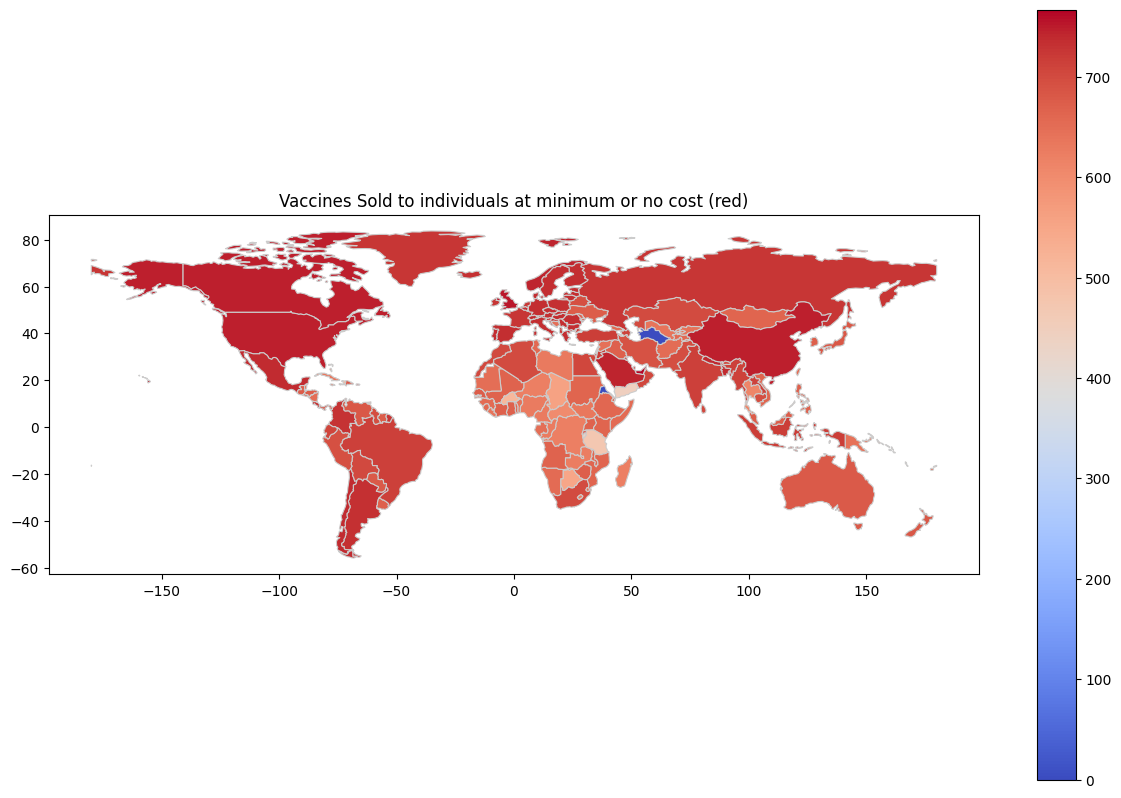

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='H7_Flag', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, aspect='equal')
ax.set_title('Vaccines Sold to individuals at minimum or no cost (red)')
plt.show()